<a href="https://colab.research.google.com/github/turhanberk/CS445_Natural_Language_Processing/blob/master/Project_1_Notebook_Berk_Turhan_25324.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Run this cell to mount your drive to this notebook in order to read the datasets
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Data Creation and Exploration

### Read Dataset

In [ ]:
# Put the folder path where the datasets are located
PATH = "/content/drive/MyDrive/445_project1/"

In [ ]:
# Read the train and test set with read_csv() method of pandas
train = pd.read_csv(PATH + "train.csv")
test = pd.read_csv(PATH + "test.csv")

### Preprocess Dataset

In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
stopWords = { i : 0 for i in stopwords.words('english')} #stopwords as dictionary (faster hashing)

**Different preprocessing algorithms to check which one will yield to better accuracy and f1-macro scores**

*preprocess1 were chosen after evaluating their performances in our models*

In [ ]:
# Define a function to perform preprocessing. This function can perform things like lowercasing, stemming, removing stopwords, etc.

def preprocess1(text: str): # preprocessing with lowercasing, stemming and punctuation removal
    lowerText = text.lower() #lowercasing the text
    tokenized = nltk.word_tokenize(lowerText) # lowered text is tokenized
    stemmer = PorterStemmer() # creating stemmer
    result = "" # creating the resulting text
    for token in tokenized: # iterating over each token
      if token.isalnum(): #check if token is alphanumerical
        result+= stemmer.stem(token) + " "  # combining with the result string
    return result.strip() # returning result string by stripping any possible whitespace

In [ ]:
def preprocess2(text: str): # preprocessing with lowercasing, lemmatizing and stopword/punctuation removal
    lowerText = text.lower() #lowercasing the text
    tokenized = nltk.word_tokenize(lowerText) # lowered text is tokenized
    lemma = nltk.wordnet.WordNetLemmatizer() # creating lemmatizer (we can also use stemmer)
    result = "" #creating the resulting text
    for token in tokenized: #iterating over each token
      if token.isalnum() and token not in stopWords: #check if token is alphanumerical and not a stopword 
        result+= lemma.lemmatize(token) + " " # combining with the result string
    return result.strip() # returning result string by stripping any possible whitespace

In [ ]:
def preprocess3(text:str): # preprocessing with lowercasing, and with removing punctuations and stopwords
    lowerText = text.lower() #lowercasing the text
    tokenized = nltk.word_tokenize(lowerText) # lowered text is tokenized
    result = "" #creating the resulting text
    for token in tokenized:
      if token.isalnum() and token not in stopWords: #stopword and punctuation removing
        result+= token + " "  # combining with the result string
    return result.strip() # returning result string by stripping any possible whitespace

In [ ]:
# Apply your preprocessing function to your text fields.
train.drop("Unnamed: 0", axis=1,inplace=True) #removing the unnecessary column coming from the train dataset
test.drop("Unnamed: 0", axis=1,inplace=True) #removing the unnecessary column coming from the test dataset

train_original = train.copy(deep=True) # storing non-processed data to try
test_original = test.copy(deep=True)  # different preprocessing methods

train.text = train.text.apply(preprocess1) # preprocessing for train data

test.text = test.text.apply(preprocess1) # preprocessing for test data

train.shape, test.shape #checking their shapes

((18000, 2), (2000, 2))

In [ ]:
train.head(5) # train data after preprocessing

,text,label
0,i came here and left a review befor but last t...,1
1,had a veri nice first visit here the owner ted...,4
2,thi is a gorgeou and veri clean hotel we had a...,4
3,the gym is dirti i have given up locker room i...,1
4,the food here is delici fast and consist everi...,5


In [ ]:
test.head(3) # test data after preprocessing

,text,label
0,i stay here for a weekend and they made my sta...,5
1,i will forev be call upon delici design whenev...,5
2,i person had onli order the homicid boneless a...,4


### Most frequent words on most negative (1) and most positive (5) reviews for train and test sets

***Codes in this part are implemented from:***

Kaymaz, E. H. (2021, December 30). Sentiment Analysis of Yelp reviews. Kaggle. Retrieved May 5, 2022 from https://www.kaggle.com/code/ebrarhalekaymaz/sentiment-analysis-of-yelp-reviews

In [ ]:
def plot_Freq(data):
    FreqDist(np.concatenate(data.text.reset_index(drop=True))).plot(20, cumulative=False) #plotting word frequencies

In [ ]:
nonstop_train = train_original.copy(deep=True) # plotting frequencies from train data
nonstop_train.text = nonstop_train.text.apply(preprocess3) 
nonstop_train["text"]= nonstop_train["text"].str.split()

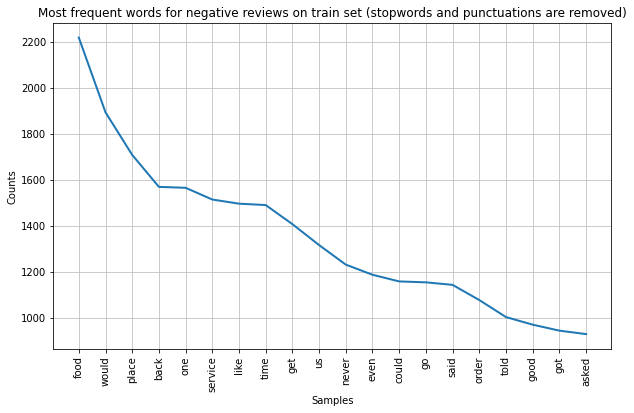

In [ ]:
fig = plt.figure(figsize=(10,6)) # most frequent words on negative reviews
plt.title('Most frequent words for negative reviews on train set (stopwords and punctuations are removed)')
plot_Freq(nonstop_train[nonstop_train['label']==1])

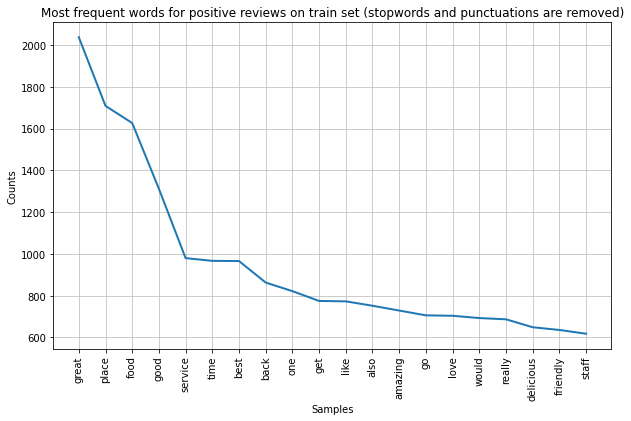

In [ ]:
fig = plt.figure(figsize=(10,6)) # most frequent words on positive reviews
plt.title('Most frequent words for positive reviews on train set (stopwords and punctuations are removed)')
plot_Freq(nonstop_train[nonstop_train['label']==5])

In [ ]:
nonstop_test = test_original.copy(deep=True) # plotting frequencies from test data
nonstop_test.text = nonstop_test.text.apply(preprocess3)
nonstop_test["text"]= nonstop_test["text"].str.split()

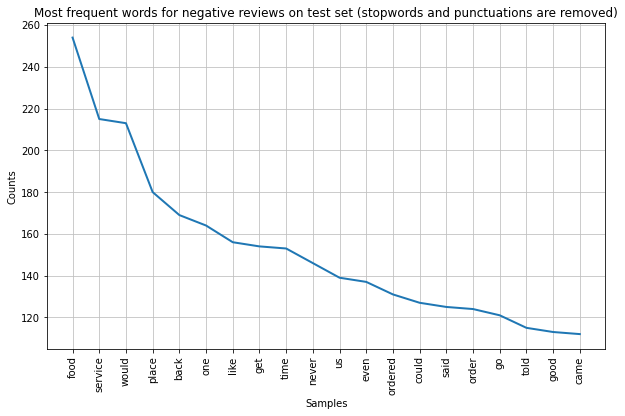

In [ ]:
fig = plt.figure(figsize=(10,6)) # most frequent words on negative reviews
plt.title('Most frequent words for negative reviews on test set (stopwords and punctuations are removed)')
plot_Freq(nonstop_test[nonstop_test['label']==1])

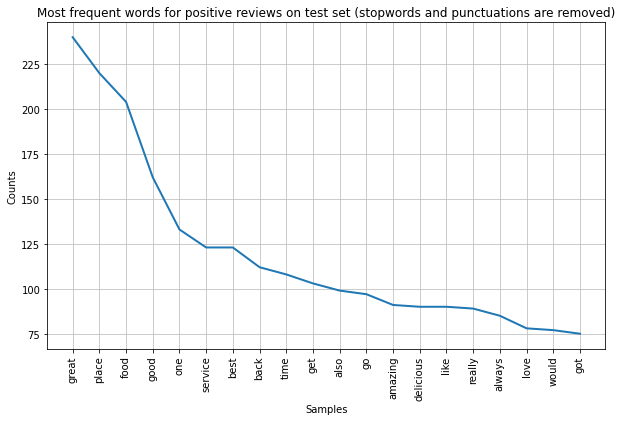

In [ ]:
fig = plt.figure(figsize=(10,6)) # most frequent words on positive reviews
plt.title('Most frequent words for positive reviews on test set (stopwords and punctuations are removed)')
plot_Freq(nonstop_test[nonstop_test['label']==5])

### Creating Binary and MultiClass Datasets

In [ ]:
# Create your binary and multiclass datasets
binaryTrain = train.copy(deep=True)
binaryTest = test.copy(deep=True)

multiTrain = train.copy(deep=True)
multiTest = test.copy(deep=True)

# For binary dataset, get rid of the class 3 in the dataset and map class 1 and 2 to 0, and class 4 and 5 to 1
binaryTrain['label'] = binaryTrain['label'].map({1: 0, 2: 0, 3: np.nan, 4: 1, 5: 1})
binaryTest['label'] = binaryTest['label'].map({1: 0, 2: 0, 3: np.nan, 4: 1, 5: 1})
binaryTrain.dropna(inplace=True)
binaryTest.dropna(inplace=True)
binaryTrain = binaryTrain.astype({'label': 'int64'})
binaryTest = binaryTest.astype({'label': 'int64'})

# For multiclass dataset, make sure your classes starts from 0 and goes until 4. (5->4, 4->3, 3->2, 2->1, 1->0)
multiTrain['label'] = multiTrain['label'].map({1: 0, 2: 1, 3: 2, 4: 3, 5: 4})
multiTest['label'] = multiTest['label'].map({1: 0, 2: 1, 3: 2, 4: 3, 5: 4})
multiTrain = multiTrain.astype({'label': 'int64'})
multiTest = multiTest.astype({'label': 'int64'})

In [ ]:
binaryTrain.shape, binaryTest.shape

((14407, 2), (1593, 2))

In [ ]:
multiTrain.shape, multiTest.shape

((18000, 2), (2000, 2))

### Distributions of Binary Datasets

**Binary Dataset Train Distribution**

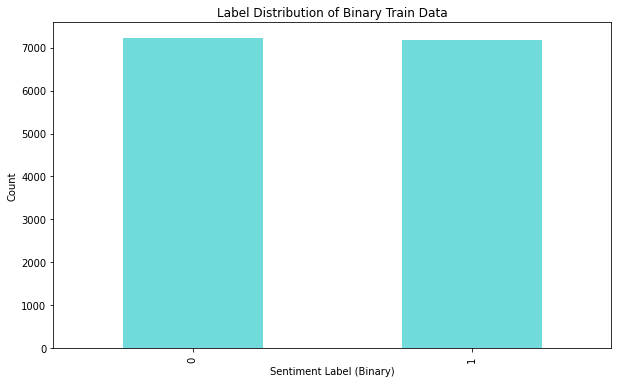

In [ ]:
binaryTrain.label.value_counts().loc[[0, 1]].plot.bar(figsize=(10,6), color='#70DBDA',xlabel="Sentiment Label (Binary)", ylabel="Count",title="Label Distribution of Binary Train Data")

Text(0.5, 1.0, 'Text Length Distribution for Binary Train Data (after preprocessing)')

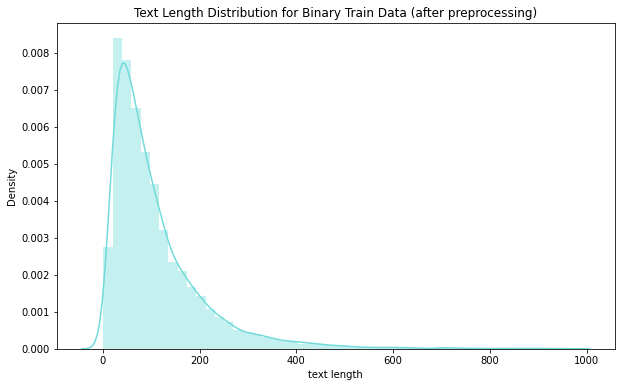

In [ ]:
binaryTrainEDA = binaryTrain.copy(deep=True)
binaryTrainEDA["text"]= binaryTrainEDA["text"].str.split()
binaryTrainEDA['text length'] = binaryTrainEDA['text'].apply(len) #check length distribution of reviews in binaryTrain
fig = plt.figure(figsize=(10,6))
sns.distplot(binaryTrainEDA['text length'], kde=True, bins=50, color='#70DBDA')
plt.title('Text Length Distribution for Binary Train Data (after preprocessing)')

**Binary Dataset Test Distribution**

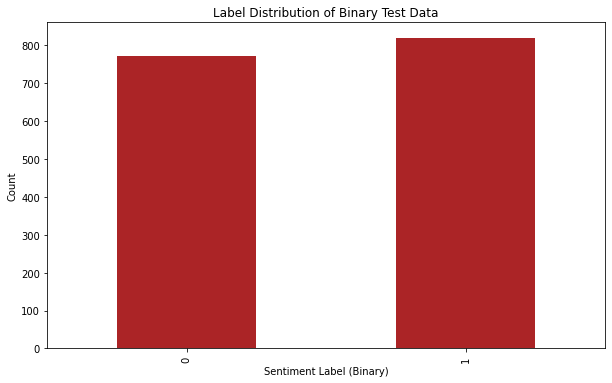

In [ ]:
binaryTest.label.value_counts().loc[[0, 1]].plot.bar(figsize=(10,6), color='#AB2426',xlabel="Sentiment Label (Binary)", ylabel="Count",title="Label Distribution of Binary Test Data")

Text(0.5, 1.0, 'Text Length Distribution for Binary Test Data (after preprocessing)')

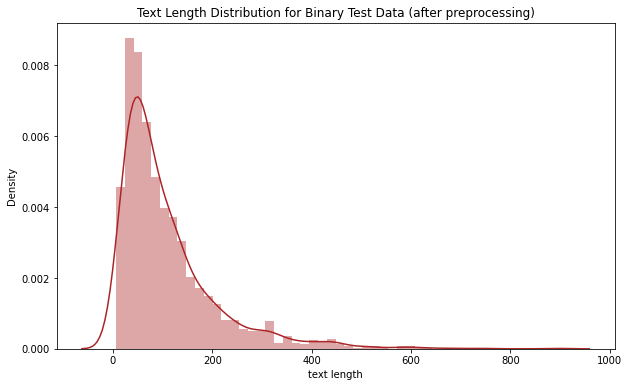

In [ ]:
binaryTestEDA = binaryTest.copy(deep=True)
binaryTestEDA["text"]= binaryTestEDA["text"].str.split()
binaryTestEDA['text length'] = binaryTestEDA['text'].apply(len) #check length distribution of reviews in binaryTest
fig = plt.figure(figsize=(10,6))
sns.distplot(binaryTestEDA['text length'], kde=True, bins=50, color='#AB2426')
plt.title('Text Length Distribution for Binary Test Data (after preprocessing)')

### Distributions of Multiclass Datasets

**MultiClass Dataset Train Distribution**

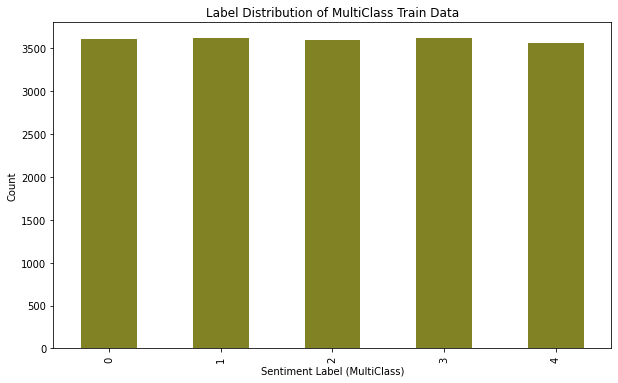

In [ ]:
multiTrain.label.value_counts().loc[[0, 1, 2, 3, 4]].plot.bar(figsize=(10,6), color='#808223',xlabel="Sentiment Label (MultiClass)", ylabel="Count",title="Label Distribution of MultiClass Train Data")

Text(0.5, 1.0, 'Text Length Distribution for MultiClass Train Data (after preprocessing)')

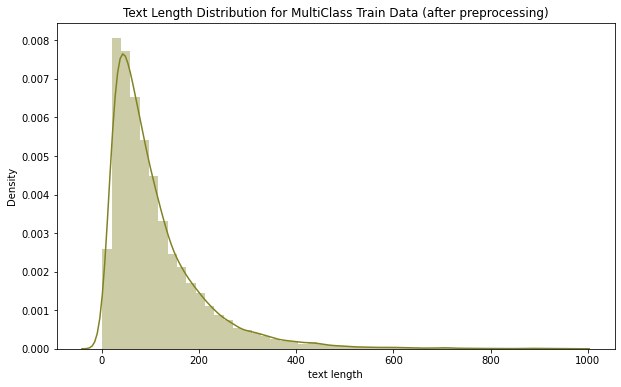

In [ ]:
MultiTrainEDA = multiTrain.copy(deep=True)
MultiTrainEDA["text"]= MultiTrainEDA["text"].str.split()
MultiTrainEDA['text length'] = MultiTrainEDA['text'].apply(len) #check length distribution of reviews in binaryTrain
fig = plt.figure(figsize=(10,6))
sns.distplot(MultiTrainEDA['text length'], kde=True, bins=50, color='#808223')
plt.title('Text Length Distribution for MultiClass Train Data (after preprocessing)')

**MultiClass Dataset Test Distribution**

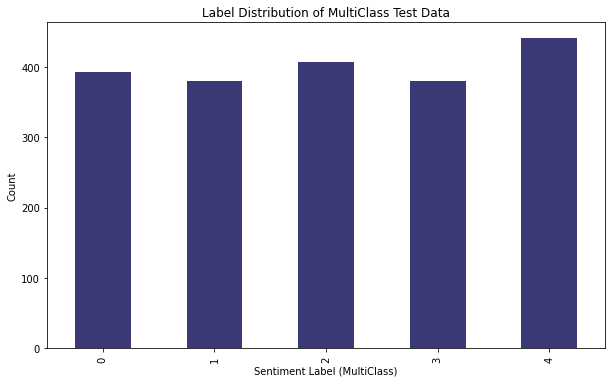

In [ ]:
multiTest.label.value_counts().loc[[0, 1, 2, 3, 4]].plot.bar(figsize=(10,6), color='#3A3975',xlabel="Sentiment Label (MultiClass)", ylabel="Count",title="Label Distribution of MultiClass Test Data")

Text(0.5, 1.0, 'Text Length Distribution for MultiClass Test Data (after preprocessing)')

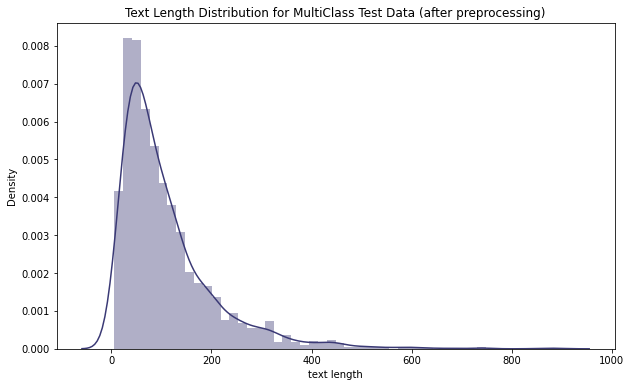

In [ ]:
MultiTestEDA = multiTest.copy(deep=True)
MultiTestEDA["text"]= MultiTestEDA["text"].str.split()
MultiTestEDA['text length'] = MultiTestEDA['text'].apply(len) #check length distribution of reviews in binaryTrain
fig = plt.figure(figsize=(10,6))
sns.distplot(MultiTestEDA['text length'], kde=True, bins=50, color='#3A3975')
plt.title('Text Length Distribution for MultiClass Test Data (after preprocessing)')

# Models

## Non-Neural Models

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score

### Naive Bayes

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

# Create a class for converting sparse matrix output of TfidfVectorizer to dense matrix for feeding into GaussianNB
class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()


# Initiate the pipeline with required components.You can use Pipeline class of sklearn -> https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
# There will be three components; 1) TfidfVectorizer 2) DenseTransformer 3) Naive Bayes classifier.

pipeline = Pipeline([
    ('vector', TfidfVectorizer()),
    ('to_dense', DenseTransformer()),
    ('nb', GaussianNB())
])

# Set the hyperparameter space that will be scanned with GridSearchCV.

hyperparameterSpace = dict(
    vector__min_df=[100, 500, 1000],
    vector__ngram_range=[(1,1), (1,2), (1,3)])

#### **Binary Classification**

In [ ]:
%%time
# Initialize and run the GridSearchCV to scan the hyperparameter and find the best hyperparameter set that will maximize the scoring option for binary classification.

gridSearchBinary = GridSearchCV(pipeline, 
                             hyperparameterSpace, 
                             verbose=1,
                             n_jobs=5,
                             scoring='f1_macro',
                             cv=5)
gridSearchBinary.fit(binaryTrain['text'], binaryTrain['label'])

Fitting 5 folds for each of 9 candidates, totalling 45 fits
CPU times: user 9.95 s, sys: 1.17 s, total: 11.1 s
Wall time: 2min 30s


In [ ]:
# Report the standard deviation of split scores for each hyperparameter group.
printDict = (pd.DataFrame(gridSearchBinary.cv_results_)).to_dict()
for i in range(9):
  print("Hyperparameters: N =", printDict['param_vector__min_df'][i],"- n-gramRange =", printDict['param_vector__ngram_range'][i], "Scores: mean test score =", printDict['mean_test_score'][i], "- std test score =", printDict['std_test_score'][i],"- rank =",printDict['rank_test_score'][i])

# Show the best parameter set for given dataset and hyperparameter space.

print("\nBest Parameters:")
best_parameters_1 = gridSearchBinary.best_estimator_.get_params()
for param_name in sorted(hyperparameterSpace.keys()):
    print(param_name,"=",best_parameters_1[param_name])

Hyperparameter: N = 100 - n-gramRange = (1, 1) Scores: mean test score = 0.8538848793498957 - std test score = 0.003997458581274185 - rank = 3
Hyperparameter: N = 100 - n-gramRange = (1, 2) Scores: mean test score = 0.8780147588614458 - std test score = 0.005493775187889016 - rank = 2
Hyperparameter: N = 100 - n-gramRange = (1, 3) Scores: mean test score = 0.8794725736732625 - std test score = 0.006423957557241051 - rank = 1
Hyperparameter: N = 500 - n-gramRange = (1, 1) Scores: mean test score = 0.8155956302626814 - std test score = 0.004873294742103427 - rank = 6
Hyperparameter: N = 500 - n-gramRange = (1, 2) Scores: mean test score = 0.8219824043962671 - std test score = 0.006339444761324913 - rank = 4
Hyperparameter: N = 500 - n-gramRange = (1, 3) Scores: mean test score = 0.8219165948107282 - std test score = 0.00711480721032781 - rank = 5
Hyperparameter: N = 1000 - n-gramRange = (1, 1) Scores: mean test score = 0.7846185500293817 - std test score = 0.005974588799051503 - rank = 7

In [ ]:
# Building the pipeline with the best parameter group and reporting Conf. Mat. and Results on the Test Set #

# Create your Pipeline object with the best parameter set.

pipelineBestBinaryNB = Pipeline([
    ('vector', TfidfVectorizer(min_df = 100, ngram_range = (1,3))),
    ('to_dense', DenseTransformer()),
    ('nb', GaussianNB())
])

# Fit your pipeline on training set.

pipelineBestBinaryNB.fit(binaryTrain['text'], binaryTrain['label'])

# Take prediction and report the F1 and Accuracy scores for binary classification. Then show the confussion table.

binaryPredictLabel = pipelineBestBinaryNB.predict(binaryTest['text'])

print("f1 score is:", f1_score(binaryTest['label'], binaryPredictLabel, average='weighted'))
print("accuracy score is:", accuracy_score(binaryTest['label'], binaryPredictLabel))
print("confusion matrix:\n", confusion_matrix(binaryTest['label'], binaryPredictLabel))

f1 score is: 0.8876497802816139
accuracy score is: 0.8876333961079724
confusion matrix:
 [[702  71]
 [108 712]]


#### **Multi-Classification**

In [ ]:
%%time
# Initialize and run the GridSearchCV to scan the hyperparameter and find the best hyperparameter set that will maximize the scoring option for multiclass classification.

gridSearchMulti = GridSearchCV(pipeline, 
                             hyperparameterSpace, 
                             verbose=1,
                             n_jobs=20,
                             scoring='f1_macro',
                             cv=5)
gridSearchMulti.fit(multiTrain['text'], multiTrain['label'])


Fitting 5 folds for each of 9 candidates, totalling 45 fits
CPU times: user 8.75 s, sys: 1.83 s, total: 10.6 s
Wall time: 3min 37s


In [ ]:
# Report the standard deviation of split scores for each hyperparameter group.
printDict = (pd.DataFrame(gridSearchMulti.cv_results_)).to_dict()
for i in range(9):
  print("Hyperparameters: N =", printDict['param_vector__min_df'][i],"- n-gramRange =", printDict['param_vector__ngram_range'][i], "Scores: mean test score =", printDict['mean_test_score'][i], "- std test score =", printDict['std_test_score'][i],"- rank =",printDict['rank_test_score'][i])

# Show the best parameter set for given dataset and hyperparameter space.

print("\nBest Parameters:")
best_parameters_1 = gridSearchMulti.best_estimator_.get_params()
for param_name in sorted(hyperparameterSpace.keys()):
    print(param_name,"=",best_parameters_1[param_name])

Hyperparameter: N = 100 - n-gramRange = (1, 1) Scores: mean test score = 0.44273061911334854 - std test score = 0.010502261034675657 - rank = 6
Hyperparameter: N = 100 - n-gramRange = (1, 2) Scores: mean test score = 0.4875471123316695 - std test score = 0.0075880819416387505 - rank = 1
Hyperparameter: N = 100 - n-gramRange = (1, 3) Scores: mean test score = 0.48706093390372046 - std test score = 0.006305648450532742 - rank = 2
Hyperparameter: N = 500 - n-gramRange = (1, 1) Scores: mean test score = 0.465301762398375 - std test score = 0.007297510612346713 - rank = 5
Hyperparameter: N = 500 - n-gramRange = (1, 2) Scores: mean test score = 0.4700899279968075 - std test score = 0.009313597606532185 - rank = 3
Hyperparameter: N = 500 - n-gramRange = (1, 3) Scores: mean test score = 0.46991667024659484 - std test score = 0.008216932563551547 - rank = 4
Hyperparameter: N = 1000 - n-gramRange = (1, 1) Scores: mean test score = 0.4345114542517967 - std test score = 0.005696196662492137 - rank

In [ ]:
# Building the pipeline with the best parameter group and reporting Conf. Mat. and Results on the Test Set #

# Create your Pipeline object with the best parameter set.

pipelineBestMultiNB = Pipeline([
    ('vector', TfidfVectorizer(min_df = 100, ngram_range = (1,2))),
    ('to_dense', DenseTransformer()),
    ('nb', GaussianNB())
])

# Fit your pipeline on training set.

pipelineBestMultiNB.fit(multiTrain['text'], multiTrain['label'])

# Take prediction and report the F1 and Accuracy scores for Multi classification. Then show the confussion table.

multiPredictLabel = pipelineBestMultiNB.predict(multiTest['text'])

print("f1 score is:", f1_score(multiTest['label'], multiPredictLabel, average='macro'))
print("accuracy score is:", accuracy_score(multiTest['label'], multiPredictLabel))
print("confusion matrix:\n", confusion_matrix(multiTest['label'], multiPredictLabel))

f1 score is: 0.5001142472132527
accuracy score is: 0.511
confusion matrix:
 [[275  87  19   9   3]
 [116 160  75  16  13]
 [ 43  78 156  93  37]
 [ 16  22  76 135 130]
 [ 19  13  25  88 296]]


### Logistic Regression

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# Initiate the pipeline with required components.You can use Pipeline class of sklearn -> https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
# There will be 2 components; 1) Word weightning 2) Logistic Regression classifier.

pipeline = Pipeline([
    ('vector', TfidfVectorizer()),
    ('lr', LogisticRegression(solver = 'saga', random_state = 22, penalty='elasticnet'))
])

#Set the hyperparameter space that will be scanned.

hyperparameterSpace = dict(
    vector__min_df=[100, 500, 1000],
    vector__ngram_range=[(1,1), (1,2), (1,3)],
    lr__l1_ratio = [0.0,0.5,1])


#### **Binary Classification**

In [ ]:
%%time
# Initialize and run the GridSearchCV to scan the hyperparameter and find the best hyperparameter set that will maximize the scoring option for binary classification.

gridSearchBinaryLR = GridSearchCV(pipeline, 
                             hyperparameterSpace, 
                             verbose=1,
                             n_jobs=20,
                             scoring='f1_macro',
                             cv=5)
gridSearchBinaryLR.fit(binaryTrain['text'], binaryTrain['label'])

Fitting 5 folds for each of 27 candidates, totalling 135 fits
CPU times: user 11.9 s, sys: 1.41 s, total: 13.3 s
Wall time: 7min 3s


In [ ]:
# Report the standard deviation of split scores for each hyperparameter group.
printDict = (pd.DataFrame(gridSearchBinaryLR.cv_results_)).to_dict()
for i in range(27):
  print("Hyperparameters: N =", printDict['param_vector__min_df'][i],"- n-gramRange =", printDict['param_vector__ngram_range'][i], "- l1-l2 ratio =", printDict['param_lr__l1_ratio'][i] ,"Scores: mean test score =", printDict['mean_test_score'][i], "- std test score =", printDict['std_test_score'][i],"- rank =",printDict['rank_test_score'][i])

# Show the best parameter set for given dataset and hyperparameter space.

print("\nBest Parameters:")
best_parameters_1 = gridSearchBinaryLR.best_estimator_.get_params()
for param_name in sorted(hyperparameterSpace.keys()):
    print(param_name,"=",best_parameters_1[param_name])


Hyperparameters: N = 100 - n-gramRange = (1, 1) - l1-l2 ratio = 0.0 Scores: mean test score = 0.9141967424141935 - std test score = 0.0033253770513026887 - rank = 8
Hyperparameters: N = 100 - n-gramRange = (1, 2) - l1-l2 ratio = 0.0 Scores: mean test score = 0.9209297929545597 - std test score = 0.003089427663532404 - rank = 3
Hyperparameters: N = 100 - n-gramRange = (1, 3) - l1-l2 ratio = 0.0 Scores: mean test score = 0.9214156641626408 - std test score = 0.0027513660308108503 - rank = 1
Hyperparameters: N = 500 - n-gramRange = (1, 1) - l1-l2 ratio = 0.0 Scores: mean test score = 0.8736958038084156 - std test score = 0.00611254381903551 - rank = 18
Hyperparameters: N = 500 - n-gramRange = (1, 2) - l1-l2 ratio = 0.0 Scores: mean test score = 0.8787650753324815 - std test score = 0.003949624347553969 - rank = 12
Hyperparameters: N = 500 - n-gramRange = (1, 3) - l1-l2 ratio = 0.0 Scores: mean test score = 0.8788329984755497 - std test score = 0.0035797619807451373 - rank = 11
Hyperparame

In [ ]:
# Building the pipeline with the best parameter group and reporting Conf. Mat. and Results on the Test Set #

# Create your Pipeline object with the best parameter set.

pipelineBestBinaryLR = Pipeline([
    ('vector', TfidfVectorizer(min_df = 100, ngram_range = (1, 3))),
    ('lr', LogisticRegression(solver = 'saga', random_state = 22, penalty='elasticnet', l1_ratio = 0.0))
])
# Fit your pipeline on training set.

pipelineBestBinaryLR.fit(binaryTrain['text'], binaryTrain['label'])

# Take prediction and report the F1 and Accuracy scores for binary classification. Then show the confussion table.

binaryPredictLabel = pipelineBestBinaryLR.predict(binaryTest['text'])

print("f1 score is:", f1_score(binaryTest['label'], binaryPredictLabel, average='macro'))
print("accuracy score is:", accuracy_score(binaryTest['label'], binaryPredictLabel))
print("confusion matrix:\n", confusion_matrix(binaryTest['label'], binaryPredictLabel))

f1 score is: 0.9233895509632577
accuracy score is: 0.9234149403640929
confusion matrix:
 [[721  52]
 [ 70 750]]


#### **Multi-Classification**

In [ ]:
%%time
# Initialize and run the GridSearchCV to scan the hyperparameter and find the best hyperparameter set that will maximize the scoring option for multiclass classification.

gridSearchMultiLR = GridSearchCV(pipeline, 
                             hyperparameterSpace, 
                             verbose=1,
                             n_jobs=20,
                             scoring='f1_macro',
                             cv=5)
gridSearchMultiLR.fit(multiTrain['text'], multiTrain['label'])

Fitting 5 folds for each of 27 candidates, totalling 135 fits
CPU times: user 42.8 s, sys: 2.8 s, total: 45.6 s
Wall time: 18min 42s


In [ ]:
# Report the standard deviation of split scores for each hyperparameter group.
printDict = (pd.DataFrame(gridSearchMultiLR.cv_results_)).to_dict()
for i in range(27):
  print("Hyperparameters: N =", printDict['param_vector__min_df'][i],"- n-gramRange =", printDict['param_vector__ngram_range'][i], "- l1-l2 ratio =", printDict['param_lr__l1_ratio'][i] ,"Scores: mean test score =", printDict['mean_test_score'][i], "- std test score =", printDict['std_test_score'][i],"- rank =",printDict['rank_test_score'][i])

# Show the best parameter set for given dataset and hyperparameter space.

print("\nBest Parameters:")
best_parameters_1 = gridSearchMultiLR.best_estimator_.get_params()
for param_name in sorted(hyperparameterSpace.keys()):
    print(param_name,"=",best_parameters_1[param_name])


Hyperparameters: N = 100 - n-gramRange = (1, 1) - l1-l2 ratio = 0.0 Scores: mean test score = 0.5416618338371089 - std test score = 0.005805592868518486 - rank = 9
Hyperparameters: N = 100 - n-gramRange = (1, 2) - l1-l2 ratio = 0.0 Scores: mean test score = 0.5562729967815376 - std test score = 0.010044416103573957 - rank = 5
Hyperparameters: N = 100 - n-gramRange = (1, 3) - l1-l2 ratio = 0.0 Scores: mean test score = 0.5566705369095434 - std test score = 0.011727431863942709 - rank = 4
Hyperparameters: N = 500 - n-gramRange = (1, 1) - l1-l2 ratio = 0.0 Scores: mean test score = 0.5251975925814399 - std test score = 0.004425551067426743 - rank = 16
Hyperparameters: N = 500 - n-gramRange = (1, 2) - l1-l2 ratio = 0.0 Scores: mean test score = 0.5219852601911252 - std test score = 0.008306804356426174 - rank = 18
Hyperparameters: N = 500 - n-gramRange = (1, 3) - l1-l2 ratio = 0.0 Scores: mean test score = 0.522060323311566 - std test score = 0.007868707355215748 - rank = 17
Hyperparameter

In [ ]:
# Building the pipeline with the best parameter group and reporting Conf. Mat. and Results on the Test Set #

# Create your Pipeline object with the best parameter set.

pipelineBestMultiLR = Pipeline([
    ('vector', TfidfVectorizer(min_df = 100, ngram_range = (1, 3))),
    ('lr', LogisticRegression(solver = 'saga', random_state = 22, penalty='elasticnet', l1_ratio = 0.5))
])
# Fit your pipeline on training set.

pipelineBestMultiLR.fit(multiTrain['text'], multiTrain['label'])

# Take prediction and report the F1 and Accuracy scores for multiclassification. Then show the confussion table.

multiPredictLabel = pipelineBestMultiLR.predict(multiTest['text'])

print("f1 score is:", f1_score(multiTest['label'], multiPredictLabel, average='macro'))
print("accuracy score is:", accuracy_score(multiTest['label'], multiPredictLabel))
print("confusion matrix:\n", confusion_matrix(multiTest['label'], multiPredictLabel))

f1 score is: 0.5586274047445283
accuracy score is: 0.5635
confusion matrix:
 [[291  72  15   7   8]
 [ 90 188  73  13  16]
 [ 21  76 198  90  22]
 [ 13  26  75 160 105]
 [ 11   9  13 118 290]]


## Neural Models

***Resources that are used to implement neural models in this section:***

Raihan, D. (2021, April 13). Deep learning techniques for text classification. Medium. Retrieved May 5, 2022, from https://towardsdatascience.com/deep-learning-techniques-for-text-classification-78d9dc40bf7c 




Mwiti, D. (2021, June 16). NLP essential guide: Convolutional Neural Network for sentence classification. cnvrg. Retrieved May 6, 2022, from https://cnvrg.io/cnn-sentence-classification/

### Convolutional Neural Network (CNN)

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import nltk,re
import tensorflow as tf
from sklearn.model_selection import train_test_split
from numpy import array,asarray,zeros

from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')

import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers.convolutional import Conv1D,MaxPooling1D
from keras.layers import Dense,Flatten,Embedding,Input,Dropout
from keras.callbacks import ModelCheckpoint
from keras.constraints import MaxNorm
from keras import regularizers

from gensim.models import Word2Vec
import gensim.downloader as api

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
# I am repeating the data creation here because I used stemmer on data for the NB and LR methods

# Binary and multiclass datasets for CNN
binaryTrainCNN = train_original.copy(deep=True)
binaryTestCNN = test_original.copy(deep=True)

multiTrainCNN = train_original.copy(deep=True)
multiTestCNN = test_original.copy(deep=True)

# For binary dataset, get rid of the class 3 in the dataset and map class 1 and 2 to 0, and class 4 and 5 to 1
binaryTrainCNN['label'] = binaryTrainCNN['label'].map({1: 0, 2: 0, 3: np.nan, 4: 1, 5: 1})
binaryTestCNN['label'] = binaryTestCNN['label'].map({1: 0, 2: 0, 3: np.nan, 4: 1, 5: 1})
binaryTrainCNN.dropna(inplace=True)
binaryTestCNN.dropna(inplace=True)
binaryTrainCNN = binaryTrainCNN.astype({'label': 'int64'})
binaryTestCNN = binaryTestCNN.astype({'label': 'int64'})

# For multiclass dataset, make sure your classes starts from 0 and goes until 4. (5->4, 4->3, 3->2, 2->1, 1->0)
multiTrainCNN['label'] = multiTrainCNN['label'].map({1: 0, 2: 1, 3: 2, 4: 3, 5: 4})
multiTestCNN['label'] = multiTestCNN['label'].map({1: 0, 2: 1, 3: 2, 4: 3, 5: 4})
multiTrainCNN = multiTrainCNN.astype({'label': 'int64'})
multiTestCNN = multiTestCNN.astype({'label': 'int64'})

#### **Binary Classification**

In [ ]:
# Create a validation set from train set
# Please use random_state of 22 and test_size of 0.1

X_train, X_val, y_train, y_val = train_test_split(binaryTrainCNN['text'],binaryTrainCNN['label'], test_size = 0.1, random_state = 22)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((12966,), (1441,), (12966,), (1441,))

In [ ]:
def maxlength(sequences): # finding the max length of an element from sequences
    max_len = 0
    for i, seq in enumerate(sequences):
        length = len(seq)
        if max_len < length:
            max_len = length
    return max_len

In [ ]:
# Prepare the dataset for CNN classifier

# Cleaning and Tokenization
tokenizer = Tokenizer(oov_token="<UNK>")
tokenizer.fit_on_texts(X_train)

# Turning the text into sequences
training_sequences = tokenizer.texts_to_sequences(X_train)
val_sequences = tokenizer.texts_to_sequences(X_val)
test_sequences = tokenizer.texts_to_sequences(binaryTestCNN['text'])

max_len = maxlength(training_sequences)

# Padding the sequences to have the same size
training_padded = pad_sequences(training_sequences, maxlen=max_len, padding='post', truncating='post')
val_padded = pad_sequences(val_sequences, maxlen=max_len, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=max_len, padding='post', truncating='post')

# tokenizing
word_index = tokenizer.word_index

# vocabulary size (+1 due to 0 indexing)
vocab_size = len(word_index)+1

##### **CNN-Rand**

In [ ]:
class myCallback(keras.callbacks.Callback):
    # Overriding the method on_epoch_end() to prevent overfitting (especially for embedding layer)
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.93):
            print("\nReached 93% accuracy so cancelling training!")
            self.model.stop_training=True


callbacks = keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, 
                                             patience=5, verbose=2, 
                                             mode='auto', restore_best_weights=True)

###### **`Convolution`:** *filters* = 50, *kernel_size* = 2 **||** **`Dense`:** *units* = 7

In [ ]:
# Create Embedding Matrices and Layers
CNNRand_0 = Sequential([
    Embedding(input_dim=vocab_size, # random embedding layer
                              output_dim=100, # output dimensions of embedding layer
                              input_length=max_len, # input length of embedding layer
                              input_shape=(max_len,)), # input shape of embedding layer
    Conv1D(filters = 50, kernel_size = 2, activation = "relu", kernel_constraint = MaxNorm(max_value=3, axis=[0,1]), kernel_initializer='he_normal'), # convolution layer
    MaxPooling1D(2), # pooling operation
    Flatten(), # flattening the cells for dropout operation
    Dropout(0.5), # dropout half of the cells
    Dense(7, activation="relu", kernel_constraint = MaxNorm(max_value=3, axis=0)), # fully connected dense layer
    Dropout(0.5),
    Dense(units=1, activation='sigmoid') # output layer with binary prediction probabilities
])

CNNRand_0.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy']) # compiling the model

# Train the model
CNNRand_0.fit(training_padded, y_train, batch_size = 50, epochs = 15, verbose = 1, validation_data=(val_padded, y_val), callbacks=[callbacks])

Epoch 1/15
260/260 [==============================] - 6s 20ms/step - loss: 0.6154 - accuracy: 0.6275 - val_loss: 0.3510 - val_accuracy: 0.9070
Epoch 2/15
260/260 [==============================] - 5s 18ms/step - loss: 0.4002 - accuracy: 0.8046 - val_loss: 0.2479 - val_accuracy: 0.9202
Epoch 3/15
260/260 [==============================] - 5s 18ms/step - loss: 0.3340 - accuracy: 0.8389 - val_loss: 0.2122 - val_accuracy: 0.9313
Epoch 4/15
260/260 [==============================] - 5s 18ms/step - loss: 0.2654 - accuracy: 0.8994 - val_loss: 0.2276 - val_accuracy: 0.9306
Epoch 5/15
260/260 [==============================] - 5s 18ms/step - loss: 0.2337 - accuracy: 0.9123 - val_loss: 0.2215 - val_accuracy: 0.9244
Epoch 6/15
260/260 [==============================] - 5s 18ms/step - loss: 0.1940 - accuracy: 0.9215 - val_loss: 0.2520 - val_accuracy: 0.9167
Epoch 7/15
260/260 [==============================] - 5s 18ms/step - loss: 0.1652 - accuracy: 0.9226 - val_loss: 0.2500 - val_accuracy: 0.9174

In [ ]:
# Evaluate the model
print("### Evaluation on Train Data ###")
loss, acc = CNNRand_0.evaluate(training_padded, y_train, verbose=0)
print("Loss in training data: ", loss, "\nAccuracy in training data: ", acc, sep = "")

print("\n### Evaluation on Validation Data ###")
loss, acc = CNNRand_0.evaluate(val_padded, y_val, verbose=0)
print("Loss in validation data: ", loss, "\nAccuracy in validation data: ", acc, sep = "")

print("\n### Evaluation on Test Data ###")
prediction_CNNRand_0 = (CNNRand_0.predict(test_padded) > 0.5).astype("int32")
print("F1-score on test data is:", f1_score(binaryTestCNN['label'], prediction_CNNRand_0, average='weighted'))
print("Accuracy on test data is:", accuracy_score(binaryTestCNN['label'], prediction_CNNRand_0))
print("Confusion matrix for test data:\n", confusion_matrix(binaryTestCNN['label'], prediction_CNNRand_0))

### Evaluation on Train Data ###
Loss in training data: 0.12318240106105804
Accuracy in training data: 0.978482186794281

### Evaluation on Validation Data ###
Loss in validation data: 0.2122390866279602
Accuracy in validation data: 0.9312977194786072

### Evaluation on Test Data ###
F1-score on test data is: 0.9039357032141686
Accuracy on test data is: 0.903954802259887
Confusion matrix for test data:
 [[692  81]
 [ 72 748]]


###### **`Convolution`:** *filters* = 100, *kernel_size* = 3 **||** **`Dense`:** *units* = 30

In [ ]:
# Create Embedding Matrices and Layers
# Architecture is the same as the CNN model above
# notice different filter number, kernel size and dense fully connected layer units 
CNNRand_1 = Sequential([
    Embedding(input_dim=vocab_size, # random embedding layer
                              output_dim=100, 
                              input_length=max_len, 
                              input_shape=(max_len,)),
    Conv1D(filters = 100, kernel_size = 3, activation = "relu", kernel_constraint = MaxNorm(max_value=3, axis=[0,1]), kernel_initializer='he_normal'),
    MaxPooling1D(2),
    Flatten(),
    Dropout(0.5),
    Dense(30, activation="relu", kernel_constraint = MaxNorm(max_value=3, axis=0)),
    Dropout(0.5),
    Dense(units=1, activation='sigmoid')
])

CNNRand_1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Train the model
CNNRand_1.fit(training_padded, y_train, batch_size = 50, epochs = 15, verbose = 1, validation_data=(val_padded, y_val), callbacks=[callbacks])


Epoch 1/15
260/260 [==============================] - 4s 13ms/step - loss: 0.4460 - accuracy: 0.7756 - val_loss: 0.2228 - val_accuracy: 0.9153
Epoch 2/15
260/260 [==============================] - 3s 12ms/step - loss: 0.1717 - accuracy: 0.9427 - val_loss: 0.1851 - val_accuracy: 0.9306
Epoch 3/15
260/260 [==============================] - 3s 12ms/step - loss: 0.0896 - accuracy: 0.9754 - val_loss: 0.2520 - val_accuracy: 0.9237
Epoch 4/15
260/260 [==============================] - 3s 12ms/step - loss: 0.0501 - accuracy: 0.9868 - val_loss: 0.2874 - val_accuracy: 0.9251
Epoch 5/15
260/260 [==============================] - 3s 12ms/step - loss: 0.0370 - accuracy: 0.9901 - val_loss: 0.3010 - val_accuracy: 0.9244
Epoch 6/15
260/260 [==============================] - 3s 12ms/step - loss: 0.0308 - accuracy: 0.9921 - val_loss: 0.3501 - val_accuracy: 0.9278
Epoch 7/15
260/260 [==============================] - 3s 12ms/step - loss: 0.0312 - accuracy: 0.9916 - val_loss: 0.3659 - val_accuracy: 0.9244

In [ ]:
# Evaluate the model
print("### Evaluation on Train Data ###")
loss, acc = CNNRand_1.evaluate(training_padded, y_train, verbose=0)
print("Loss in training data: ", loss, "\nAccuracy in training data: ", acc, sep = "")

print("\n### Evaluation on Validation Data ###")
loss, acc = CNNRand_1.evaluate(val_padded, y_val, verbose=0)
print("Loss in validation data: ", loss, "\nAccuracy in validation data: ", acc, sep = "")

print("\n### Evaluation on Test Data ###")
prediction_cnnRand_1 = (CNNRand_1.predict(test_padded) > 0.5).astype("int32")
print("F1-score on test data is:", f1_score(binaryTestCNN['label'], prediction_cnnRand_1, average='weighted'))
print("Accuracy on test data is:", accuracy_score(binaryTestCNN['label'], prediction_cnnRand_1))
print("Confusion matrix for test data:\n", confusion_matrix(binaryTestCNN['label'], prediction_cnnRand_1))

### Evaluation on Train Data ###
Loss in training data: 0.06386244297027588
Accuracy in training data: 0.9841123223304749

### Evaluation on Validation Data ###
Loss in validation data: 0.18505966663360596
Accuracy in validation data: 0.9306037425994873

### Evaluation on Test Data ###
F1-score on test data is: 0.9133601303607689
Accuracy on test data is: 0.9133709981167608
Confusion matrix for test data:
 [[701  72]
 [ 66 754]]


###### **`Convolution`:** *filters* = 300, *kernel_size* = 1 **||** **`Dense`:** *units* = 10

In [ ]:
# Create Embedding Matrices and Layers
# Architecture is the same as the CNN model above
# notice different filter number, kernel size and dense fully connected layer units 
CNNRand_2 = Sequential([
    Embedding(input_dim=vocab_size, # random embedding layer
                              output_dim=300, 
                              input_length=max_len, 
                              input_shape=(max_len,)),
    Conv1D(filters = 300, kernel_size = 1, activation = "relu", kernel_constraint= MaxNorm(max_value=3, axis=[0,1]), kernel_initializer='he_normal'),
    MaxPooling1D(2),
    Flatten(),
    Dropout(0.5),
    Dense(10, activation="relu", kernel_constraint = MaxNorm(max_value=3, axis=0)),
    Dropout(0.5),
    Dense(units=1, activation='sigmoid')
])

CNNRand_2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Train the model
CNNRand_2.fit(training_padded, y_train, batch_size = 50, epochs = 15, verbose = 1, validation_data=(val_padded, y_val))

Epoch 1/15
260/260 [==============================] - 33s 64ms/step - loss: 0.4688 - accuracy: 0.7561 - val_loss: 0.2110 - val_accuracy: 0.9195
Epoch 2/15
260/260 [==============================] - 16s 62ms/step - loss: 0.2041 - accuracy: 0.9270 - val_loss: 0.2063 - val_accuracy: 0.9167
Epoch 3/15
260/260 [==============================] - 16s 63ms/step - loss: 0.1309 - accuracy: 0.9566 - val_loss: 0.2292 - val_accuracy: 0.9098
Epoch 4/15
260/260 [==============================] - 16s 63ms/step - loss: 0.0917 - accuracy: 0.9702 - val_loss: 0.3121 - val_accuracy: 0.9084
Epoch 5/15
260/260 [==============================] - 16s 63ms/step - loss: 0.0702 - accuracy: 0.9762 - val_loss: 0.3313 - val_accuracy: 0.9098
Epoch 6/15
260/260 [==============================] - 16s 63ms/step - loss: 0.0650 - accuracy: 0.9764 - val_loss: 0.4071 - val_accuracy: 0.9133
Epoch 7/15
260/260 [==============================] - 16s 63ms/step - loss: 0.0626 - accuracy: 0.9789 - val_loss: 0.4051 - val_accuracy:

In [ ]:
# Evaluate the model
print("### Evaluation on Train Data ###")
loss, acc = CNNRand_2.evaluate(training_padded, y_train, verbose=0)
print("Loss in training data: ", loss, "\nAccuracy in training data: ", acc, sep = "")

print("\n### Evaluation on Validation Data ###")
loss, acc = CNNRand_2.evaluate(val_padded, y_val, verbose=0)
print("Loss in validation data: ", loss, "\nAccuracy in validation data: ", acc, sep = "")

print("\n### Evaluation on Test Data ###")
prediction_cnnRand_2 = (CNNRand_2.predict(test_padded) > 0.5).astype("int32")
print("F1-score on test data is:", f1_score(binaryTestCNN['label'], prediction_cnnRand_2, average='weighted'))
print("Accuracy on test data is:", accuracy_score(binaryTestCNN['label'], prediction_cnnRand_2))
print("Confusion matrix for test data:\n", confusion_matrix(binaryTestCNN['label'], prediction_cnnRand_2))

### Evaluation on Train Data ###
Loss in training data: 0.006165036000311375
Accuracy in training data: 0.998303234577179

### Evaluation on Validation Data ###
Loss in validation data: 0.5247946977615356
Accuracy in validation data: 0.8882720470428467

### Evaluation on Test Data ###
F1-score on test data is: 0.8901674192334721
Accuracy on test data is: 0.8901443816698054
Confusion matrix for test data:
 [[695  78]
 [ 97 723]]


##### **CNN-Static**

###### **`embedding:`** created from training set

In [ ]:
def embeddingPreprocess(text: str): # preprocessing with lowercasing and punctuation removal
    lowerText = text.lower() # lowercasing the text
    sentences = nltk.sent_tokenize(lowerText) # lowered text is sentence tokenized
    result = []
    for sentence in sentences: # iterating over the sentences
      temp = []
      tokenized = nltk.word_tokenize(sentence) # word tokenizing on sentences
      for token in tokenized:
        if token.isalnum():
          temp.append(token) # taking each word if it is not a punctuation etc.
      result.append(temp)
    return result # returning resulted list

In [ ]:
# Create your own word embeddings from scratch

# You can check https://radimrehurek.com/gensim/models/word2vec.html for training a word embeddings from scratch
embeddingTrain = X_train.copy(deep = True)
embeddingTrain = embeddingTrain.apply(embeddingPreprocess) # sentence tokenizing in each review
sentenceTokenized = [item for sublist in embeddingTrain.to_list() for item in sublist] # each sentence in training list
wordEmbedding = Word2Vec(sentences=sentenceTokenized, size=max_len, window=5, min_count=1, workers=4) # creating our own embeddings

In [ ]:
own_embedding_matrix = np.zeros((len(word_index) + 1, max_len)) # embedding matrix consisting only the words in our training set
for word, i in word_index.items():
    if word in wordEmbedding:
        # words not found in embedding index will be all-zeros.
        own_embedding_matrix[i] = wordEmbedding[word]

In [ ]:
# Create Embedding Matrices and Layers
# Architecture is the same as the CNN models above, only trainable difference

CNNStatic_1 = Sequential([
    Embedding(input_dim=vocab_size,
                              output_dim=max_len, 
                              input_length=max_len, 
                              input_shape=(max_len,),
                              weights = [own_embedding_matrix], # using embedding matrix created from scratch as weights
                              trainable=False # trainable is false since we are implementing CNN-Static
            ),
    Conv1D(filters = 100, kernel_size = 3, activation = "relu", kernel_constraint= MaxNorm(max_value=3, axis=[0,1]), kernel_initializer='he_normal'),
    MaxPooling1D(2),
    Flatten(),
    Dropout(0.5),
    Dense(30, activation="relu", kernel_constraint = MaxNorm(max_value=3, axis=0)),
    Dropout(0.5),
    Dense(units=1, activation='sigmoid')
])

CNNStatic_1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Train the model
CNNStatic_1.fit(training_padded, y_train, batch_size = 50, epochs = 15, verbose = 1, validation_data=(val_padded, y_val))

Epoch 1/15
260/260 [==============================] - 9s 34ms/step - loss: 0.5754 - accuracy: 0.6663 - val_loss: 0.4059 - val_accuracy: 0.8244
Epoch 2/15
260/260 [==============================] - 9s 33ms/step - loss: 0.4659 - accuracy: 0.7726 - val_loss: 0.3634 - val_accuracy: 0.8522
Epoch 3/15
260/260 [==============================] - 9s 33ms/step - loss: 0.4199 - accuracy: 0.8151 - val_loss: 0.3310 - val_accuracy: 0.8598
Epoch 4/15
260/260 [==============================] - 9s 33ms/step - loss: 0.3769 - accuracy: 0.8356 - val_loss: 0.3080 - val_accuracy: 0.8654
Epoch 5/15
260/260 [==============================] - 9s 34ms/step - loss: 0.3646 - accuracy: 0.8361 - val_loss: 0.3132 - val_accuracy: 0.8716
Epoch 6/15
260/260 [==============================] - 9s 33ms/step - loss: 0.3301 - accuracy: 0.8491 - val_loss: 0.2919 - val_accuracy: 0.8786
Epoch 7/15
260/260 [==============================] - 9s 33ms/step - loss: 0.3194 - accuracy: 0.8517 - val_loss: 0.2881 - val_accuracy: 0.8883

In [ ]:
# Evaluate the model
print("### Evaluation on Train Data ###")
loss, acc = CNNStatic_1.evaluate(training_padded, y_train, verbose=0)
print("Loss in training data: ", loss, "\nAccuracy in training data: ", acc, sep = "")

print("\n### Evaluation on Validation Data ###")
loss, acc = CNNStatic_1.evaluate(val_padded, y_val, verbose=0)
print("Loss in validation data: ", loss, "\nAccuracy in validation data: ", acc, sep = "")

print("\n### Evaluation on Test Data ###")
prediction_CNNStatic_1 = (CNNStatic_1.predict(test_padded) > 0.5).astype("int32")
print("F1-score on test data is:", f1_score(binaryTestCNN['label'], prediction_CNNStatic_1, average='weighted'))
print("Accuracy on test data is:", accuracy_score(binaryTestCNN['label'], prediction_CNNStatic_1))
print("Confusion matrix for test data:\n", confusion_matrix(binaryTestCNN['label'], prediction_CNNStatic_1))

### Evaluation on Train Data ###
Loss in training data: 0.14621156454086304
Accuracy in training data: 0.9450100064277649

### Evaluation on Validation Data ###
Loss in validation data: 0.2637028396129608
Accuracy in validation data: 0.8910478949546814

### Evaluation on Test Data ###
F1-score on test data is: 0.8837930951075501
Accuracy on test data is: 0.8838669177652229
Confusion matrix for test data:
 [[669 104]
 [ 81 739]]


###### **`embedding:`** imported from word2vec

***Imported pre-trained embedding model is taken from:***

Pre-trained vectors based on 2B tweets, 27B tokens, 1.2M vocab, uncased (https://nlp.stanford.edu/projects/glove/)

In [ ]:
# Load a pretrained word embeddings
# You can check https://radimrehurek.com/gensim/auto_examples/howtos/run_downloader_api.html and https://github.com/RaRe-Technologies/gensim-data for loading pretrained word embeddings. 

importedEmbeddings = api.load("glove-twitter-100")

[==================================================] 100.0% 387.1/387.1MB downloaded


In [ ]:
imported_embedding_matrix = np.zeros((len(word_index) + 1, max_len))
for word, i in word_index.items():
    if word in importedEmbeddings:
        # words not found in embedding index will be all-zeros.
        imported_embedding_matrix[i] = np.pad(importedEmbeddings[word], (0, max_len-len(importedEmbeddings[word])), 'constant')

In [ ]:
# Create Embedding Matrices and Layers
# Architecture is the same as the CNN models above, only trainable difference
CNNStatic_2 = Sequential([
    Embedding(input_dim=vocab_size,
                              output_dim=max_len, 
                              input_length=max_len, 
                              input_shape=(max_len,),
                              weights = [imported_embedding_matrix], # using embedding matrix imported from word2vec
                              trainable=False # trainable is false since we are implementing CNN-Static
            ),
    Conv1D(filters = 100, kernel_size = 3, activation = "relu", kernel_constraint= MaxNorm(max_value=3, axis=[0,1]), kernel_initializer='he_normal'),
    MaxPooling1D(2),
    Flatten(),
    Dropout(0.5),
    Dense(30, activation="relu", kernel_constraint = MaxNorm(max_value=3, axis=0)),
    Dropout(0.5),
    Dense(units=1, activation='sigmoid')
])

CNNStatic_2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Train the model
CNNStatic_2.fit(training_padded, y_train, batch_size = 50, epochs = 15, verbose = 1, validation_data=(val_padded, y_val))

Epoch 1/15
260/260 [==============================] - 21s 78ms/step - loss: 0.4998 - accuracy: 0.7481 - val_loss: 0.3115 - val_accuracy: 0.8917
Epoch 2/15
260/260 [==============================] - 20s 77ms/step - loss: 0.3259 - accuracy: 0.8774 - val_loss: 0.2635 - val_accuracy: 0.8945
Epoch 3/15
260/260 [==============================] - 20s 76ms/step - loss: 0.2796 - accuracy: 0.8933 - val_loss: 0.2486 - val_accuracy: 0.9091
Epoch 4/15
260/260 [==============================] - 20s 76ms/step - loss: 0.2422 - accuracy: 0.9107 - val_loss: 0.2161 - val_accuracy: 0.9264
Epoch 5/15
260/260 [==============================] - 20s 77ms/step - loss: 0.2249 - accuracy: 0.9169 - val_loss: 0.2176 - val_accuracy: 0.9181
Epoch 6/15
260/260 [==============================] - 20s 76ms/step - loss: 0.1975 - accuracy: 0.9290 - val_loss: 0.2135 - val_accuracy: 0.9264
Epoch 7/15
260/260 [==============================] - 20s 76ms/step - loss: 0.1798 - accuracy: 0.9331 - val_loss: 0.2354 - val_accuracy:

In [ ]:
# Evaluate the model
print("### Evaluation on Train Data ###")
loss, acc = CNNStatic_2.evaluate(training_padded, y_train, verbose=0)
print("Loss in training data: ", loss, "\nAccuracy in training data: ", acc, sep = "")

print("\n### Evaluation on Validation Data ###")
loss, acc = CNNStatic_2.evaluate(val_padded, y_val, verbose=0)
print("Loss in validation data: ", loss, "\nAccuracy in validation data: ", acc, sep = "")

print("\n### Evaluation on Test Data ###")
prediction_CNNStatic_2 = (CNNStatic_2.predict(test_padded) > 0.5).astype("int32")
print("F1-score on test data is:", f1_score(binaryTestCNN['label'], prediction_CNNStatic_2, average='weighted'))
print("Accuracy on test data is:", accuracy_score(binaryTestCNN['label'], prediction_CNNStatic_2))
print("Confusion matrix for test data:\n", confusion_matrix(binaryTestCNN['label'], prediction_CNNStatic_2))

### Evaluation on Train Data ###
Loss in training data: 0.04737202823162079
Accuracy in training data: 0.9902822971343994

### Evaluation on Validation Data ###
Loss in validation data: 0.2073085904121399
Accuracy in validation data: 0.9257460236549377

### Evaluation on Test Data ###
F1-score on test data is: 0.902704374599175
Accuracy on test data is: 0.9026993094789705
Confusion matrix for test data:
 [[697  76]
 [ 79 741]]


##### **CNN-NonStatic**

In [ ]:
class myCallback(keras.callbacks.Callback):
    # Overriding the method on_epoch_end() to prevent overfitting (especially for embedding layer)
    def on_epoch_end(self, epoch, logs={}):
        return
        if (logs.get('accuracy') > 0.93):
            print("\nReached 93% accuracy so cancelling training!")
            self.model.stop_training=True

callbacks = keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, 
                                             patience=10, verbose=2, 
                                             mode='auto', restore_best_weights=True)

###### **`embedding:`** created from training set

In [ ]:
# Create Embedding Matrices and Layers
# Architecture is the same as the CNN models above, trainable is true for dynamic models
CNNNonStatic_1 = Sequential([
    Embedding(input_dim=vocab_size,
                              output_dim=max_len, 
                              input_length=max_len, 
                              input_shape=(max_len,),
                              weights = [own_embedding_matrix], # using embedding matrix created from scratch as weights
                              trainable=True # now trainable is true since we want a dynamic model
            ),
    Conv1D(filters = 100, kernel_size = 3, activation = "relu", kernel_constraint= MaxNorm(max_value=3, axis=[0,1]), kernel_initializer='he_normal'),
    MaxPooling1D(2),
    Flatten(),
    Dropout(0.5),
    Dense(30, activation="relu", kernel_constraint = MaxNorm(max_value=3, axis=0)),
    Dropout(0.5),
    Dense(units=1, activation='sigmoid')
])

CNNNonStatic_1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Train the model
CNNNonStatic_1.fit(training_padded, y_train, batch_size = 50, epochs = 15, verbose = 1,  callbacks=[callbacks], validation_data=(val_padded, y_val))

Epoch 1/15
260/260 [==============================] - 38s 134ms/step - loss: 0.4574 - accuracy: 0.7765 - val_loss: 0.2352 - val_accuracy: 0.9035
Epoch 2/15
260/260 [==============================] - 34s 131ms/step - loss: 0.2359 - accuracy: 0.9115 - val_loss: 0.1888 - val_accuracy: 0.9306
Epoch 3/15
260/260 [==============================] - 34s 130ms/step - loss: 0.1424 - accuracy: 0.9517 - val_loss: 0.1948 - val_accuracy: 0.9389
Epoch 4/15
260/260 [==============================] - 34s 131ms/step - loss: 0.0998 - accuracy: 0.9668 - val_loss: 0.2153 - val_accuracy: 0.9285
Epoch 5/15
260/260 [==============================] - 33s 129ms/step - loss: 0.0738 - accuracy: 0.9750 - val_loss: 0.2548 - val_accuracy: 0.9327
Epoch 6/15
260/260 [==============================] - 33s 128ms/step - loss: 0.0520 - accuracy: 0.9830 - val_loss: 0.2576 - val_accuracy: 0.9355
Epoch 7/15
260/260 [==============================] - 34s 129ms/step - loss: 0.0378 - accuracy: 0.9887 - val_loss: 0.3445 - val_ac

In [ ]:
# Evaluate the model
print("### Evaluation on Train Data ###")
loss, acc = CNNNonStatic_1.evaluate(training_padded, y_train, verbose=0)
print("Loss in training data: ", loss, "\nAccuracy in training data: ", acc, sep = "")

print("\n### Evaluation on Validation Data ###")
loss, acc = CNNNonStatic_1.evaluate(val_padded, y_val, verbose=0)
print("Loss in validation data: ", loss, "\nAccuracy in validation data: ", acc, sep = "")

print("\n### Evaluation on Test Data ###")
prediction_CNNNonStatic_1 = (CNNNonStatic_1.predict(test_padded) > 0.5).astype("int32")
print("F1-score on test data is:", f1_score(binaryTestCNN['label'], prediction_CNNNonStatic_1, average='weighted'))
print("Accuracy on test data is:", accuracy_score(binaryTestCNN['label'], prediction_CNNNonStatic_1))
print("Confusion matrix for test data:\n", confusion_matrix(binaryTestCNN['label'], prediction_CNNNonStatic_1))

### Evaluation on Train Data ###
Loss in training data: 0.0570840984582901
Accuracy in training data: 0.9831867814064026

### Evaluation on Validation Data ###
Loss in validation data: 0.19476594030857086
Accuracy in validation data: 0.9389312863349915

### Evaluation on Test Data ###
F1-score on test data is: 0.919004612513907
Accuracy on test data is: 0.9190207156308852
Confusion matrix for test data:
 [[704  69]
 [ 60 760]]


###### **`embedding:`** imported from word2vec

In [ ]:
# Create Embedding Matrices and Layers
# Architecture is the same as the CNN models above, trainable is true for dynamic models
CNNNonStatic_2 = Sequential([
    Embedding(input_dim=vocab_size,
                              output_dim=max_len, 
                              input_length=max_len, 
                              input_shape=(max_len,),
                              weights = [imported_embedding_matrix], # using embedding matrix imported from word2vec
                              trainable=True # now trainable is true since we want a dynamic model
            ),
    Conv1D(filters = 100, kernel_size = 3, activation = "relu", kernel_constraint= MaxNorm(max_value=3, axis=[0,1]), kernel_initializer='he_normal'),
    MaxPooling1D(2),
    Flatten(),
    Dropout(0.5),
    Dense(30, activation="relu", kernel_constraint = MaxNorm(max_value=3, axis=0)),
    Dropout(0.5),
    Dense(units=1, activation='sigmoid')
])

CNNNonStatic_2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Train the model
CNNNonStatic_2.fit(training_padded, y_train, batch_size = 50, epochs = 15, verbose = 1,  callbacks=[callbacks], validation_data=(val_padded, y_val))

Epoch 1/15
260/260 [==============================] - 35s 132ms/step - loss: 0.3744 - accuracy: 0.8213 - val_loss: 0.1987 - val_accuracy: 0.9251
Epoch 2/15
260/260 [==============================] - 34s 131ms/step - loss: 0.1611 - accuracy: 0.9498 - val_loss: 0.2008 - val_accuracy: 0.9327
Epoch 3/15
260/260 [==============================] - 34s 130ms/step - loss: 0.0766 - accuracy: 0.9758 - val_loss: 0.2953 - val_accuracy: 0.9216
Epoch 4/15
260/260 [==============================] - 34s 129ms/step - loss: 0.0510 - accuracy: 0.9859 - val_loss: 0.3428 - val_accuracy: 0.9299
Epoch 5/15
260/260 [==============================] - 34s 129ms/step - loss: 0.0388 - accuracy: 0.9895 - val_loss: 0.4519 - val_accuracy: 0.9230
Epoch 6/15
260/260 [==============================] - 34s 131ms/step - loss: 0.0359 - accuracy: 0.9904 - val_loss: 0.3822 - val_accuracy: 0.9257
Epoch 7/15
260/260 [==============================] - 34s 131ms/step - loss: 0.0253 - accuracy: 0.9939 - val_loss: 0.4135 - val_ac

In [ ]:
# Evaluate the model
print("### Evaluation on Train Data ###")
loss, acc = CNNNonStatic_2.evaluate(training_padded, y_train, verbose=0)
print("Loss in training data: ", loss, "\nAccuracy in training data: ", acc, sep = "")

print("\n### Evaluation on Validation Data ###")
loss, acc = CNNNonStatic_2.evaluate(val_padded, y_val, verbose=0)
print("Loss in validation data: ", loss, "\nAccuracy in validation data: ", acc, sep = "")

print("\n### Evaluation on Test Data ###")
prediction_CNNNonStatic_2 = (CNNNonStatic_2.predict(test_padded) > 0.5).astype("int32")
print("F1-score on test data is:", f1_score(binaryTestCNN['label'], prediction_CNNNonStatic_2, average='weighted'))
print("Accuracy on test data is:", accuracy_score(binaryTestCNN['label'], prediction_CNNNonStatic_2))
print("Confusion matrix for test data:\n", confusion_matrix(binaryTestCNN['label'], prediction_CNNNonStatic_2))

### Evaluation on Train Data ###
Loss in training data: 0.048700664192438126
Accuracy in training data: 0.9876600503921509

### Evaluation on Validation Data ###
Loss in validation data: 0.2008211612701416
Accuracy in validation data: 0.9326856136322021

### Evaluation on Test Data ###
F1-score on test data is: 0.9177129484275085
Accuracy on test data is: 0.9177652228499686
Confusion matrix for test data:
 [[696  77]
 [ 54 766]]


##### **CNN-MultiChannel**

***Codes for MultiChannel CNN architecture are adapted from:***

Brownlee, J. (2020, September 2). How to develop a multichannel CNN model for text classification. Machine Learning Mastery. Retrieved May 8, 2022, from https://machinelearningmastery.com/develop-n-gram-multichannel-convolutional-neural-network-sentiment-analysis/ 


In [ ]:
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate

In [ ]:
def multiChannelModel(max_len, vocab_size, embeddingMatrix):
	# channel 1 (trainable)
	inputs1 = Input(shape=(max_len,))
	embedding1 = Embedding(input_dim=vocab_size, output_dim=max_len, input_length=max_len, input_shape=(max_len,), weights = [embeddingMatrix], trainable=True)(inputs1)
	conv1 = Conv1D(filters=100, kernel_size=3, activation='relu')(embedding1)
	drop1 = Dropout(0.5)(conv1)
	pool1 = MaxPooling1D(pool_size=2)(drop1)
	flat1 = Flatten()(pool1)
	# channel 2 (not trainable)
	inputs2 = Input(shape=(max_len,))
	embedding2 = Embedding(input_dim=vocab_size, output_dim=max_len, input_length=max_len, input_shape=(max_len,), weights = [embeddingMatrix],trainable=False)(inputs2)
	conv2 = Conv1D(filters=100, kernel_size=3, activation='relu')(embedding2)
	drop2 = Dropout(0.5)(conv2)
	pool2 = MaxPooling1D(pool_size=2)(drop2)
	flat2 = Flatten()(pool2)
	# merging the channels
	merged = concatenate([flat1, flat2])
	# interpretation with fully connected dense layer
	dense1 = Dense(30, activation='relu')(merged)
	drop3 = Dropout(0.5)(dense1)
	outputs = Dense(1, activation='sigmoid')(drop3)
	model = Model(inputs=[inputs1, inputs2], outputs=outputs)
	# compile
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

	return model

###### **`embedding:`** created from training set

In [ ]:
# Create Embedding Matrices and Layers
CNNMulti_1 = multiChannelModel(max_len,vocab_size,own_embedding_matrix) #  using embedding matrix created from scratch as weights 

# Train the model
CNNMulti_1.fit([training_padded,training_padded], y_train, batch_size = 50, epochs = 15, verbose = 1, callbacks=[callbacks], validation_data=([val_padded, val_padded], y_val))

Epoch 1/15
260/260 [==============================] - 37s 95ms/step - loss: 0.4991 - accuracy: 0.7666 - val_loss: 0.3611 - val_accuracy: 0.8563
Epoch 2/15
260/260 [==============================] - 24s 94ms/step - loss: 0.2984 - accuracy: 0.8951 - val_loss: 0.2027 - val_accuracy: 0.9257
Epoch 3/15
260/260 [==============================] - 24s 93ms/step - loss: 0.1808 - accuracy: 0.9407 - val_loss: 0.1869 - val_accuracy: 0.9396
Epoch 4/15
260/260 [==============================] - 24s 92ms/step - loss: 0.1105 - accuracy: 0.9647 - val_loss: 0.2838 - val_accuracy: 0.8987
Epoch 5/15
260/260 [==============================] - 24s 93ms/step - loss: 0.0862 - accuracy: 0.9738 - val_loss: 0.2408 - val_accuracy: 0.9167
Epoch 6/15
260/260 [==============================] - 24s 93ms/step - loss: 0.0509 - accuracy: 0.9850 - val_loss: 0.3599 - val_accuracy: 0.9202
Epoch 7/15
260/260 [==============================] - 24s 92ms/step - loss: 0.0474 - accuracy: 0.9860 - val_loss: 0.3316 - val_accuracy:

In [ ]:
# Evaluate the model
print("### Evaluation on Train Data ###")
loss, acc = CNNMulti_1.evaluate([training_padded,training_padded], y_train, verbose=0)
print("Loss in training data: ", loss, "\nAccuracy in training data: ", acc, sep = "")

print("\n### Evaluation on Validation Data ###")
loss, acc = CNNMulti_1.evaluate([val_padded, val_padded], y_val, verbose=0)
print("Loss in validation data: ", loss, "\nAccuracy in validation data: ", acc, sep = "")

print("\n### Evaluation on Test Data ###")
prediction_CNNMulti_1 = (CNNMulti_1.predict([test_padded, test_padded]) > 0.5).astype("int32")
print("F1-score on test data is:", f1_score(binaryTestCNN['label'], prediction_CNNMulti_1, average='weighted'))
print("Accuracy on test data is:", accuracy_score(binaryTestCNN['label'], prediction_CNNMulti_1))
print("Confusion matrix for test data:\n", confusion_matrix(binaryTestCNN['label'], prediction_CNNMulti_1))

### Evaluation on Train Data ###
Loss in training data: 0.07037844508886337
Accuracy in training data: 0.9767082929611206

### Evaluation on Validation Data ###
Loss in validation data: 0.18687431514263153
Accuracy in validation data: 0.9396252632141113

### Evaluation on Test Data ###
F1-score on test data is: 0.9202516688084085
Accuracy on test data is: 0.9202762084118016
Confusion matrix for test data:
 [[703  70]
 [ 57 763]]


###### **`embedding:`** imported from word2vec

In [ ]:
# Create Embedding Matrices and Layers
CNNMulti_2 = multiChannelModel(max_len,vocab_size,imported_embedding_matrix) # using embedding matrix imported from word2vec

# Train the model
CNNMulti_2.fit([training_padded,training_padded], y_train, batch_size = 50, epochs = 15, verbose = 1, callbacks=[callbacks], validation_data=([val_padded, val_padded], y_val))

Epoch 1/15
260/260 [==============================] - 24s 89ms/step - loss: 0.4319 - accuracy: 0.7896 - val_loss: 0.1890 - val_accuracy: 0.9375
Epoch 2/15
260/260 [==============================] - 23s 89ms/step - loss: 0.1727 - accuracy: 0.9472 - val_loss: 0.2584 - val_accuracy: 0.9237
Epoch 3/15
260/260 [==============================] - 23s 90ms/step - loss: 0.0914 - accuracy: 0.9716 - val_loss: 0.2926 - val_accuracy: 0.9195
Epoch 4/15
260/260 [==============================] - 23s 90ms/step - loss: 0.0630 - accuracy: 0.9820 - val_loss: 0.2439 - val_accuracy: 0.9251
Epoch 5/15
260/260 [==============================] - 23s 90ms/step - loss: 0.0367 - accuracy: 0.9887 - val_loss: 0.3928 - val_accuracy: 0.9278
Epoch 6/15
260/260 [==============================] - 23s 89ms/step - loss: 0.0358 - accuracy: 0.9902 - val_loss: 0.4104 - val_accuracy: 0.9327
Epoch 7/15
260/260 [==============================] - 23s 90ms/step - loss: 0.0221 - accuracy: 0.9934 - val_loss: 0.5278 - val_accuracy:

In [ ]:
# Evaluate the model
print("### Evaluation on Train Data ###")
loss, acc = CNNMulti_2.evaluate([training_padded,training_padded], y_train, verbose=0)
print("Loss in training data: ", loss, "\nAccuracy in training data: ", acc, sep = "")

print("\n### Evaluation on Validation Data ###")
loss, acc = CNNMulti_2.evaluate([val_padded, val_padded], y_val, verbose=0)
print("Loss in validation data: ", loss, "\nAccuracy in validation data: ", acc, sep = "")

print("\n### Evaluation on Test Data ###")
prediction_CNNMulti_2 = (CNNMulti_2.predict([test_padded, test_padded]) > 0.5).astype("int32")
print("F1-score on test data is:", f1_score(binaryTestCNN['label'], prediction_CNNMulti_2, average='weighted'))
print("Accuracy on test data is:", accuracy_score(binaryTestCNN['label'], prediction_CNNMulti_2))
print("Confusion matrix for test data:\n", confusion_matrix(binaryTestCNN['label'], prediction_CNNMulti_2))

### Evaluation on Train Data ###
Loss in training data: 0.122305728495121
Accuracy in training data: 0.9615918397903442

### Evaluation on Validation Data ###
Loss in validation data: 0.1889577955007553
Accuracy in validation data: 0.9375433921813965

### Evaluation on Test Data ###
F1-score on test data is: 0.922170803192334
Accuracy on test data is: 0.9221594475831764
Confusion matrix for test data:
 [[716  57]
 [ 67 753]]


#### **Multi-Classification**

In [ ]:
# Create a validation set from train set
# Please use random_state of 22 and test_size of 0.1

X_train, X_val, y_train, y_val = train_test_split(multiTrainCNN['text'],multiTrainCNN['label'], test_size = 0.1, random_state = 22)

X_train.shape, X_val.shape, y_train.shape, y_val.shape


((16200,), (1800,), (16200,), (1800,))

In [ ]:
# Prepare the dataset for CNN classifier

# Cleaning and Tokenization
tokenizer = Tokenizer(oov_token="<UNK>")
tokenizer.fit_on_texts(X_train)

# Turning the text into sequence
training_sequences = tokenizer.texts_to_sequences(X_train)
val_sequences = tokenizer.texts_to_sequences(X_val)
test_sequences = tokenizer.texts_to_sequences(multiTestCNN['text'])

max_len = maxlength(training_sequences)

# Padding the sequences to have the same size
training_padded = pad_sequences(training_sequences, maxlen=max_len, padding='post', truncating='post')
val_padded = pad_sequences(val_sequences, maxlen=max_len, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=max_len, padding='post', truncating='post')

# tokenizing and vocab size
word_index = tokenizer.word_index
vocab_size = len(word_index)+1

# number of multiclasses
numClass = len(np.unique((multiTrainCNN['label']).to_list()))

# one hot encoding for the multiclass labels 
y_train = tf.one_hot(y_train, numClass)
y_val = tf.one_hot(y_val, numClass)

##### **CNN-Rand**

***MultiCNN classes are adapted to this project from the GitHub repo and arXiv preprint below:***



Marc Moreno Lopez, Jugal Kalita: “Deep Learning applied to NLP”, 2017; [http://arxiv.org/abs/1703.03091 arXiv:1703.03091]. Retrieved on May 8 from https://github.com/Rayryu/CNN-based-sentimental-analysis-multiclass-classification

###### **`Convolution`:** *filters* = 50, *kernel_size* = 2, 3 (3-gram) **||** **`Dense`:** *units* = 128

In [ ]:
from keras import layers
from keras.models import Model

def multiCNN_random_threegram(emb_dim, nb_filters, FFN_units, dropout_rate, nb_classes):
  inputs1 = layers.Input(shape=(max_len,)) # input layer
  x = layers.Embedding(vocab_size, emb_dim)(inputs1) # embedding layer without weights for random embedding
  x_1 = layers.Conv1D(filters=nb_filters, kernel_size=2, padding="valid", activation="relu")(x) # first convolution layer for 2-gram
  x_1 = layers.GlobalMaxPool1D()(x_1) # pooling
  x_2 = layers.Conv1D(filters=nb_filters, kernel_size=3, padding="valid", activation="relu")(x) # second convolution layer for 3-gram
  x_2 = layers.GlobalMaxPool1D()(x_2) # pooling

  merged = tf.concat([x_1, x_2], axis=-1) # merging the layers
  merged = layers.Dense(units=FFN_units, activation="relu")(merged) # fully connected layer
  merged = layers.Dropout(rate=dropout_rate)(merged) # dropping
  output = layers.Dense(units=nb_classes, activation="softmax")(merged)  # output layer 
  model = Model(inputs=inputs1, outputs=output)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["categorical_accuracy"])
  return model

In [ ]:
multiCNN_random_3n = multiCNN_random_threegram(200, 50, 128, 0.2, numClass)
multiCNN_random_3n.fit(training_padded, y_train, batch_size=50, epochs=5, validation_data=(val_padded, y_val))

Epoch 1/5
324/324 [==============================] - 20s 21ms/step - loss: 1.2329 - categorical_accuracy: 0.4492 - val_loss: 1.0202 - val_categorical_accuracy: 0.5606
Epoch 2/5
324/324 [==============================] - 6s 20ms/step - loss: 0.8552 - categorical_accuracy: 0.6351 - val_loss: 1.0013 - val_categorical_accuracy: 0.5756
Epoch 3/5
324/324 [==============================] - 6s 19ms/step - loss: 0.5705 - categorical_accuracy: 0.7789 - val_loss: 1.0950 - val_categorical_accuracy: 0.5689
Epoch 4/5
324/324 [==============================] - 6s 20ms/step - loss: 0.2913 - categorical_accuracy: 0.9044 - val_loss: 1.3332 - val_categorical_accuracy: 0.5783
Epoch 5/5
324/324 [==============================] - 6s 20ms/step - loss: 0.1239 - categorical_accuracy: 0.9658 - val_loss: 1.6276 - val_categorical_accuracy: 0.5761


In [ ]:
# Evaluate the model
print("### Evaluation on Train Data ###")
loss, acc = multiCNN_random_3n.evaluate(training_padded, y_train, verbose=0)
print("Loss in training data: ", loss, "\nAccuracy in training data: ", acc, sep = "")

print("\n### Evaluation on Validation Data ###")
loss, acc = multiCNN_random_3n.evaluate(val_padded, y_val, verbose=0)
print("Loss in validation data: ", loss, "\nAccuracy in validation data: ", acc, sep = "")

print("\n### Evaluation on Test Data ###")
prediction_multiCNN_random_3n = np.argmax((multiCNN_random_3n.predict(test_padded)), axis=1)
print("F1-score on test data is:", f1_score(multiTestCNN['label'], prediction_multiCNN_random_3n, average='weighted'))
print("Accuracy on test data is:", accuracy_score(multiTestCNN['label'], prediction_multiCNN_random_3n))
print("Confusion matrix for test data:\n", confusion_matrix(multiTestCNN['label'], prediction_multiCNN_random_3n))

### Evaluation on Train Data ###
Loss in training data: 0.0455547459423542
Accuracy in training data: 0.9932715892791748

### Evaluation on Validation Data ###
Loss in validation data: 1.6275790929794312
Accuracy in validation data: 0.5761111378669739

### Evaluation on Test Data ###
F1-score on test data is: 0.5656065907203366
Accuracy on test data is: 0.562
Confusion matrix for test data:
 [[265  96  17   8   7]
 [ 78 191  84  19   8]
 [ 12  76 194 102  23]
 [  8  19  77 194  81]
 [  5   6  17 133 280]]


###### **`Convolution`:** *filters* = 100, *kernel_size* = 2, 3, 4 (4-gram) **||** **`Dense`:** *units* = 256

In [ ]:
from keras import layers
from keras.models import Model

def multiCNN_random_fourgram(emb_dim, nb_filters, FFN_units, dropout_rate, nb_classes):
  inputs1 = layers.Input(shape=(max_len,)) # input layer
  x = layers.Embedding(vocab_size, emb_dim)(inputs1) # embedding layer without weights for random embedding
  x_1 = layers.Conv1D(filters=nb_filters, kernel_size=2, padding="valid", activation="relu")(x) # first convolution layer for 2-gram
  x_1 = layers.GlobalMaxPool1D()(x_1) # pooling
  x_2 = layers.Conv1D(filters=nb_filters, kernel_size=3, padding="valid", activation="relu")(x) # first convolution layer for 3-gram
  x_2 = layers.GlobalMaxPool1D()(x_2) # pooling
  x_3 = layers.Conv1D(filters=nb_filters, kernel_size=4, padding="valid", activation="relu")(x) # first convolution layer for 4-gram
  x_3 = layers.GlobalMaxPool1D()(x_3) # pooling

  merged = tf.concat([x_1, x_2, x_3], axis=-1) # merging the layers 
  merged = layers.Dense(units=FFN_units, activation="relu")(merged) # fully connected layer
  merged = layers.Dropout(rate=dropout_rate)(merged) # dropping cells
  output = layers.Dense(units=nb_classes, activation="softmax")(merged)  # output layer
  model = Model(inputs=inputs1, outputs=output)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["categorical_accuracy"])
  return model

In [ ]:
multiCNN_random_4n = multiCNN_random_fourgram(200, 100, 256, 0.2, numClass)
multiCNN_random_4n.fit(training_padded, y_train, batch_size=50, epochs=5, validation_data=(val_padded, y_val))

Epoch 1/5
324/324 [==============================] - 14s 39ms/step - loss: 1.2068 - categorical_accuracy: 0.4559 - val_loss: 1.0064 - val_categorical_accuracy: 0.5506
Epoch 2/5
324/324 [==============================] - 13s 39ms/step - loss: 0.8175 - categorical_accuracy: 0.6499 - val_loss: 0.9463 - val_categorical_accuracy: 0.6006
Epoch 3/5
324/324 [==============================] - 13s 39ms/step - loss: 0.4837 - categorical_accuracy: 0.8135 - val_loss: 1.1272 - val_categorical_accuracy: 0.5772
Epoch 4/5
324/324 [==============================] - 12s 38ms/step - loss: 0.2088 - categorical_accuracy: 0.9320 - val_loss: 1.4160 - val_categorical_accuracy: 0.5600
Epoch 5/5
324/324 [==============================] - 12s 37ms/step - loss: 0.0732 - categorical_accuracy: 0.9827 - val_loss: 1.6919 - val_categorical_accuracy: 0.5744


In [ ]:
# Evaluate the model
print("### Evaluation on Train Data ###")
loss, acc = multiCNN_random_4n.evaluate(training_padded, y_train, verbose=0)
print("Loss in training data: ", loss, "\nAccuracy in training data: ", acc, sep = "")

print("\n### Evaluation on Validation Data ###")
loss, acc = multiCNN_random_4n.evaluate(val_padded, y_val, verbose=0)
print("Loss in validation data: ", loss, "\nAccuracy in validation data: ", acc, sep = "")

print("\n### Evaluation on Test Data ###")
prediction_multiCNN_random_4n = np.argmax((multiCNN_random_4n.predict(test_padded)), axis=1)
print("F1-score on test data is:", f1_score(multiTestCNN['label'], prediction_multiCNN_random_4n, average='weighted'))
print("Accuracy on test data is:", accuracy_score(multiTestCNN['label'], prediction_multiCNN_random_4n))
print("Confusion matrix for test data:\n", confusion_matrix(multiTestCNN['label'], prediction_multiCNN_random_4n))

### Evaluation on Train Data ###
Loss in training data: 0.01954917050898075
Accuracy in training data: 0.9974074363708496

### Evaluation on Validation Data ###
Loss in validation data: 1.6919431686401367
Accuracy in validation data: 0.5744444727897644

### Evaluation on Test Data ###
F1-score on test data is: 0.5836783388886019
Accuracy on test data is: 0.579
Confusion matrix for test data:
 [[267 104  14   4   4]
 [ 73 211  80  12   4]
 [ 15  84 201  87  20]
 [  6  19  86 206  62]
 [  4   6  19 139 273]]


##### **CNN-Static**

###### **`embedding:`** created from training set

In [ ]:
def embeddingPreprocessMulti(text: str): # preprocessing with lowercasing and punctuation removal
    lowerText = text.lower() #lowercasing the text
    sentences = nltk.sent_tokenize(lowerText) # lowered text is sentence tokenized
    result = []
    for sentence in sentences: # iterating over sentences
      temp = []
      tokenized = nltk.word_tokenize(sentence) # word tokenizing
      for token in tokenized:
        if token.isalnum(): # removing punctuation
          temp.append(token)
      result.append(temp)
    return result # returning the resulted list

In [ ]:
# Create your own word embeddings from scratch

# You can check https://radimrehurek.com/gensim/models/word2vec.html for training a word embeddings from scratch
embeddingTrainMulti = X_train.copy(deep = True)
embeddingTrainMulti = embeddingTrainMulti.apply(embeddingPreprocessMulti) # sentence tokenizing in each review
sentenceTokenizedMulti = [item for sublist in embeddingTrainMulti.to_list() for item in sublist]
wordEmbeddingMulti = Word2Vec(sentences=sentenceTokenizedMulti, size=max_len, window=5, min_count=1, workers=4) # word embedding from training data

In [ ]:
own_embedding_matrix_multi = np.zeros((len(word_index) + 1, max_len)) # word embedding matrix from the words in training data
for word, i in word_index.items():
    if word in wordEmbeddingMulti:
        # words not found in embedding index will be all-zeros.
        own_embedding_matrix_multi[i] = wordEmbeddingMulti[word]

In [ ]:
from keras import layers
from keras.models import Model
# Architecture is the same as the CNN models above

def multiCNN_static_ownEmbedding(emb_dim, nb_filters, FFN_units, dropout_rate, nb_classes, embeddingMatrix):
  inputs1 = layers.Input(shape=(max_len,))
  x = layers.Embedding(vocab_size, emb_dim, weights = [embeddingMatrix], trainable=False)(inputs1) #trainable is false for static model with embedding matrix from training data
  x_1 = layers.Conv1D(filters=nb_filters, kernel_size=2, padding="valid", activation="relu")(x)
  x_1 = layers.GlobalMaxPool1D()(x_1)
  x_2 = layers.Conv1D(filters=nb_filters, kernel_size=3, padding="valid", activation="relu")(x)
  x_2 = layers.GlobalMaxPool1D()(x_2)
  x_3 = layers.Conv1D(filters=nb_filters, kernel_size=4, padding="valid", activation="relu")(x)
  x_3 = layers.GlobalMaxPool1D()(x_3)

  merged = tf.concat([x_1, x_2, x_3], axis=-1)
  merged = layers.Dense(units=FFN_units, activation="relu")(merged)
  merged = layers.Dropout(rate=dropout_rate)(merged)
  output = layers.Dense(units=nb_classes, activation="softmax")(merged)  
  model = Model(inputs=inputs1, outputs=output)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["categorical_accuracy"])
  return model  

In [ ]:
multiCNN_static_1 = multiCNN_static_ownEmbedding(max_len, 200, 256, 0.2, numClass, embeddingMatrix = own_embedding_matrix_multi)
multiCNN_static_1.fit(training_padded, y_train, batch_size=50, epochs=10, validation_data=(val_padded, y_val))

Epoch 1/10
324/324 [==============================] - 43s 129ms/step - loss: 1.3103 - categorical_accuracy: 0.4260 - val_loss: 1.1296 - val_categorical_accuracy: 0.5150
Epoch 2/10
324/324 [==============================] - 41s 127ms/step - loss: 1.1152 - categorical_accuracy: 0.5059 - val_loss: 1.0651 - val_categorical_accuracy: 0.5222
Epoch 3/10
324/324 [==============================] - 41s 127ms/step - loss: 1.0259 - categorical_accuracy: 0.5456 - val_loss: 1.0649 - val_categorical_accuracy: 0.5356
Epoch 4/10
324/324 [==============================] - 41s 127ms/step - loss: 0.9672 - categorical_accuracy: 0.5715 - val_loss: 1.0247 - val_categorical_accuracy: 0.5444
Epoch 5/10
324/324 [==============================] - 41s 127ms/step - loss: 0.9204 - categorical_accuracy: 0.5935 - val_loss: 1.1131 - val_categorical_accuracy: 0.5411
Epoch 6/10
324/324 [==============================] - 41s 127ms/step - loss: 0.8712 - categorical_accuracy: 0.6155 - val_loss: 1.1027 - val_categorical_acc

In [ ]:
# Evaluate the model
print("### Evaluation on Train Data ###")
loss, acc = multiCNN_static_1.evaluate(training_padded, y_train, verbose=0)
print("Loss in training data: ", loss, "\nAccuracy in training data: ", acc, sep = "")

print("\n### Evaluation on Validation Data ###")
loss, acc = multiCNN_static_1.evaluate(val_padded, y_val, verbose=0)
print("Loss in validation data: ", loss, "\nAccuracy in validation data: ", acc, sep = "")

print("\n### Evaluation on Test Data ###")
prediction_multiCNN_static_1= np.argmax((multiCNN_static_1.predict(test_padded)), axis=1)
print("F1-score on test data is:", f1_score(multiTestCNN['label'], prediction_multiCNN_static_1, average='weighted'))
print("Accuracy on test data is:", accuracy_score(multiTestCNN['label'], prediction_multiCNN_static_1))
print("Confusion matrix for test data:\n", confusion_matrix(multiTestCNN['label'], prediction_multiCNN_static_1))

### Evaluation on Train Data ###
Loss in training data: 0.5116326808929443
Accuracy in training data: 0.8108642101287842

### Evaluation on Validation Data ###
Loss in validation data: 1.1885710954666138
Accuracy in validation data: 0.54666668176651

### Evaluation on Test Data ###
F1-score on test data is: 0.5397438438102682
Accuracy on test data is: 0.5455
Confusion matrix for test data:
 [[249  93  30   5  16]
 [ 58 199  91  14  18]
 [ 12  80 190  84  41]
 [  2  17  93 114 153]
 [  6   5  21  70 339]]


###### **`embedding:`** imported from word2vec


***Imported pre-trained embedding model is taken from:***

Pre-trained vectors based on 2B tweets, 27B tokens, 1.2M vocab, uncased (https://nlp.stanford.edu/projects/glove/)

In [ ]:
# Load a pretrained word embeddings
# You can check https://radimrehurek.com/gensim/auto_examples/howtos/run_downloader_api.html and https://github.com/RaRe-Technologies/gensim-data for loading pretrained word embeddings. 

importedEmbeddings = api.load("glove-twitter-100") 

[==================================================] 100.0% 387.1/387.1MB downloaded


In [ ]:
imported_embedding_matrix_multi = np.zeros((len(word_index) + 1, max_len))
for word, i in word_index.items():
    if word in importedEmbeddings:
        # words not found in embedding index will be all-zeros.
        imported_embedding_matrix_multi[i] = np.pad(importedEmbeddings[word], (0, max_len-len(importedEmbeddings[word])), 'constant')

In [ ]:
from keras import layers
from keras.models import Model
# Architecture is the same as the CNN models above

def multiCNN_static_importedEmbedding(emb_dim, nb_filters, FFN_units, dropout_rate, nb_classes, embeddingMatrix):
  inputs1 = layers.Input(shape=(max_len,))
  x = layers.Embedding(vocab_size, emb_dim, weights = [embeddingMatrix], trainable=False)(inputs1) # trainable is false for static model with the embedding matrix from imported model
  x_1 = layers.Conv1D(filters=nb_filters, kernel_size=2, padding="valid", activation="relu")(x)
  x_1 = layers.GlobalMaxPool1D()(x_1)
  x_2 = layers.Conv1D(filters=nb_filters, kernel_size=3, padding="valid", activation="relu")(x)
  x_2 = layers.GlobalMaxPool1D()(x_2)
  x_3 = layers.Conv1D(filters=nb_filters, kernel_size=4, padding="valid", activation="relu")(x)
  x_3 = layers.GlobalMaxPool1D()(x_3)

  merged = tf.concat([x_1, x_2, x_3], axis=-1)
  merged = layers.Dense(units=FFN_units, activation="relu")(merged)
  merged = layers.Dropout(rate=dropout_rate)(merged)
  output = layers.Dense(units=nb_classes, activation="softmax")(merged)  
  model = Model(inputs=inputs1, outputs=output)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["categorical_accuracy"])
  return model  

In [ ]:
multiCNN_static_2 = multiCNN_static_importedEmbedding(max_len, 200, 256, 0.2, numClass, embeddingMatrix = imported_embedding_matrix_multi)
multiCNN_static_2.fit(training_padded, y_train, batch_size=50, epochs=10, validation_data=(val_padded, y_val))

Epoch 1/10
324/324 [==============================] - 43s 126ms/step - loss: 1.2340 - categorical_accuracy: 0.4478 - val_loss: 1.0203 - val_categorical_accuracy: 0.5556
Epoch 2/10
324/324 [==============================] - 40s 123ms/step - loss: 0.9667 - categorical_accuracy: 0.5755 - val_loss: 1.0207 - val_categorical_accuracy: 0.5494
Epoch 3/10
324/324 [==============================] - 40s 124ms/step - loss: 0.8335 - categorical_accuracy: 0.6405 - val_loss: 0.9718 - val_categorical_accuracy: 0.5700
Epoch 4/10
324/324 [==============================] - 39s 121ms/step - loss: 0.7083 - categorical_accuracy: 0.6977 - val_loss: 1.0849 - val_categorical_accuracy: 0.5611
Epoch 5/10
324/324 [==============================] - 39s 121ms/step - loss: 0.5662 - categorical_accuracy: 0.7701 - val_loss: 1.1310 - val_categorical_accuracy: 0.5539
Epoch 6/10
324/324 [==============================] - 39s 122ms/step - loss: 0.4018 - categorical_accuracy: 0.8493 - val_loss: 1.3979 - val_categorical_acc

In [ ]:
# Evaluate the model
print("### Evaluation on Train Data ###")
loss, acc = multiCNN_static_2.evaluate(training_padded, y_train, verbose=0)
print("Loss in training data: ", loss, "\nAccuracy in training data: ", acc, sep = "")

print("\n### Evaluation on Validation Data ###")
loss, acc = multiCNN_static_2.evaluate(val_padded, y_val, verbose=0)
print("Loss in validation data: ", loss, "\nAccuracy in validation data: ", acc, sep = "")

print("\n### Evaluation on Test Data ###")
prediction_multiCNN_static_2= np.argmax((multiCNN_static_2.predict(test_padded)), axis=1)
print("F1-score on test data is:", f1_score(multiTestCNN['label'], prediction_multiCNN_static_2, average='weighted'))
print("Accuracy on test data is:", accuracy_score(multiTestCNN['label'], prediction_multiCNN_static_2))
print("Confusion matrix for test data:\n", confusion_matrix(multiTestCNN['label'], prediction_multiCNN_static_2))

### Evaluation on Train Data ###
Loss in training data: 0.052375368773937225
Accuracy in training data: 0.9870370626449585

### Evaluation on Validation Data ###
Loss in validation data: 1.9647988080978394
Accuracy in validation data: 0.5561110973358154

### Evaluation on Test Data ###
F1-score on test data is: 0.5554080268613152
Accuracy on test data is: 0.55
Confusion matrix for test data:
 [[245 116  23   6   3]
 [ 56 230  74  14   6]
 [ 20  91 191  95  10]
 [  4  18  83 222  52]
 [  6   8  29 186 212]]


##### **CNN-NonStatic**

###### **`embedding:`** created from training set

In [ ]:
from keras import layers
from keras.models import Model
# Architecture is the same as the CNN models above

def multiCNN_NonStatic_ownEmbedding(emb_dim, nb_filters, FFN_units, dropout_rate, nb_classes, embeddingMatrix):
  inputs1 = layers.Input(shape=(max_len,))
  x = layers.Embedding(vocab_size, emb_dim, weights = [embeddingMatrix])(inputs1) # trainable model with the embedding matrix from training data
  x_1 = layers.Conv1D(filters=nb_filters, kernel_size=2, padding="valid", activation="relu")(x)
  x_1 = layers.GlobalMaxPool1D()(x_1)
  x_2 = layers.Conv1D(filters=nb_filters, kernel_size=3, padding="valid", activation="relu")(x)
  x_2 = layers.GlobalMaxPool1D()(x_2)
  x_3 = layers.Conv1D(filters=nb_filters, kernel_size=4, padding="valid", activation="relu")(x)
  x_3 = layers.GlobalMaxPool1D()(x_3)

  merged = tf.concat([x_1, x_2, x_3], axis=-1)
  merged = layers.Dense(units=FFN_units, activation="relu")(merged)
  merged = layers.Dropout(rate=dropout_rate)(merged)
  output = layers.Dense(units=nb_classes, activation="softmax")(merged)  
  model = Model(inputs=inputs1, outputs=output)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["categorical_accuracy"])
  return model  

In [ ]:
multiCNN_Nonstatic_1 = multiCNN_NonStatic_ownEmbedding(max_len, 200, 256, 0.2, numClass, embeddingMatrix = own_embedding_matrix_multi)
multiCNN_Nonstatic_1.fit(training_padded, y_train, batch_size=50, epochs=10, validation_data=(val_padded, y_val))

Epoch 1/10
324/324 [==============================] - 66s 199ms/step - loss: 1.3180 - categorical_accuracy: 0.4341 - val_loss: 1.1235 - val_categorical_accuracy: 0.4994
Epoch 2/10
324/324 [==============================] - 65s 200ms/step - loss: 1.0379 - categorical_accuracy: 0.5404 - val_loss: 1.0175 - val_categorical_accuracy: 0.5594
Epoch 3/10
324/324 [==============================] - 64s 199ms/step - loss: 0.9085 - categorical_accuracy: 0.6030 - val_loss: 0.9860 - val_categorical_accuracy: 0.5722
Epoch 4/10
324/324 [==============================] - 64s 198ms/step - loss: 0.7687 - categorical_accuracy: 0.6661 - val_loss: 1.0475 - val_categorical_accuracy: 0.5578
Epoch 5/10
324/324 [==============================] - 64s 199ms/step - loss: 0.6227 - categorical_accuracy: 0.7386 - val_loss: 1.1041 - val_categorical_accuracy: 0.5644
Epoch 6/10
324/324 [==============================] - 64s 198ms/step - loss: 0.4823 - categorical_accuracy: 0.8052 - val_loss: 1.3315 - val_categorical_acc

In [ ]:
# Evaluate the model
print("### Evaluation on Train Data ###")
loss, acc = multiCNN_Nonstatic_1.evaluate(training_padded, y_train, verbose=0)
print("Loss in training data: ", loss, "\nAccuracy in training data: ", acc, sep = "")

print("\n### Evaluation on Validation Data ###")
loss, acc = multiCNN_Nonstatic_1.evaluate(val_padded, y_val, verbose=0)
print("Loss in validation data: ", loss, "\nAccuracy in validation data: ", acc, sep = "")

print("\n### Evaluation on Test Data ###")
prediction_multiCNN_Nonstatic_1= np.argmax((multiCNN_Nonstatic_1.predict(test_padded)), axis=1)
print("F1-score on test data is:", f1_score(multiTestCNN['label'], prediction_multiCNN_Nonstatic_1, average='weighted'))
print("Accuracy on test data is:", accuracy_score(multiTestCNN['label'], prediction_multiCNN_Nonstatic_1))
print("Confusion matrix for test data:\n", confusion_matrix(multiTestCNN['label'], prediction_multiCNN_Nonstatic_1))

### Evaluation on Train Data ###
Loss in training data: 0.12111982703208923
Accuracy in training data: 0.9545679092407227

### Evaluation on Validation Data ###
Loss in validation data: 2.42293643951416
Accuracy in validation data: 0.550000011920929

### Evaluation on Test Data ###
F1-score on test data is: 0.5677605422301684
Accuracy on test data is: 0.573
Confusion matrix for test data:
 [[294  88   4   2   5]
 [ 99 225  43   9   4]
 [ 24 112 179  70  22]
 [  6  32  89 141 111]
 [ 12  13  27  82 307]]


###### **`embedding:`** imported from word2vec


In [ ]:
from keras import layers
from keras.models import Model
# Architecture is the same as the CNN models above

def multiCNN_NonStatic_importedEmbedding(emb_dim, nb_filters, FFN_units, dropout_rate, nb_classes, embeddingMatrix):
  inputs1 = layers.Input(shape=(max_len,))
  x = layers.Embedding(vocab_size, emb_dim, weights = [embeddingMatrix])(inputs1) # trainable model with the embedding matrix from imported model
  x_1 = layers.Conv1D(filters=nb_filters, kernel_size=2, padding="valid", activation="relu")(x)
  x_1 = layers.GlobalMaxPool1D()(x_1)
  x_2 = layers.Conv1D(filters=nb_filters, kernel_size=3, padding="valid", activation="relu")(x)
  x_2 = layers.GlobalMaxPool1D()(x_2)
  x_3 = layers.Conv1D(filters=nb_filters, kernel_size=4, padding="valid", activation="relu")(x)
  x_3 = layers.GlobalMaxPool1D()(x_3)

  merged = tf.concat([x_1, x_2, x_3], axis=-1)
  merged = layers.Dense(units=FFN_units, activation="relu")(merged)
  merged = layers.Dropout(rate=dropout_rate)(merged)
  output = layers.Dense(units=nb_classes, activation="softmax")(merged)  
  model = Model(inputs=inputs1, outputs=output)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["categorical_accuracy"])
  return model  

In [ ]:
multiCNN_Nonstatic_2 = multiCNN_NonStatic_importedEmbedding(max_len, 200, 256, 0.2, numClass, embeddingMatrix = imported_embedding_matrix_multi)
multiCNN_Nonstatic_2.fit(training_padded, y_train, batch_size=50, epochs=5, validation_data=(val_padded, y_val))

Epoch 1/5
324/324 [==============================] - 66s 200ms/step - loss: 1.1581 - categorical_accuracy: 0.4825 - val_loss: 0.9463 - val_categorical_accuracy: 0.5850
Epoch 2/5
324/324 [==============================] - 64s 198ms/step - loss: 0.7635 - categorical_accuracy: 0.6767 - val_loss: 0.9626 - val_categorical_accuracy: 0.5911
Epoch 3/5
324/324 [==============================] - 64s 198ms/step - loss: 0.4070 - categorical_accuracy: 0.8453 - val_loss: 1.3028 - val_categorical_accuracy: 0.5517
Epoch 4/5
324/324 [==============================] - 64s 198ms/step - loss: 0.1614 - categorical_accuracy: 0.9438 - val_loss: 1.6954 - val_categorical_accuracy: 0.5356
Epoch 5/5
324/324 [==============================] - 64s 198ms/step - loss: 0.0495 - categorical_accuracy: 0.9850 - val_loss: 1.9416 - val_categorical_accuracy: 0.5633


In [ ]:
# Evaluate the model
print("### Evaluation on Train Data ###")
loss, acc = multiCNN_Nonstatic_2.evaluate(training_padded, y_train, verbose=0)
print("Loss in training data: ", loss, "\nAccuracy in training data: ", acc, sep = "")

print("\n### Evaluation on Validation Data ###")
loss, acc = multiCNN_Nonstatic_2.evaluate(val_padded, y_val, verbose=0)
print("Loss in validation data: ", loss, "\nAccuracy in validation data: ", acc, sep = "")

print("\n### Evaluation on Test Data ###")
prediction_multiCNN_Nonstatic_2= np.argmax((multiCNN_Nonstatic_2.predict(test_padded)), axis=1)
print("F1-score on test data is:", f1_score(multiTestCNN['label'], prediction_multiCNN_Nonstatic_2, average='weighted'))
print("Accuracy on test data is:", accuracy_score(multiTestCNN['label'], prediction_multiCNN_Nonstatic_2))
print("Confusion matrix for test data:\n", confusion_matrix(multiTestCNN['label'], prediction_multiCNN_Nonstatic_2))

### Evaluation on Train Data ###
Loss in training data: 0.008593425154685974
Accuracy in training data: 0.9990123510360718

### Evaluation on Validation Data ###
Loss in validation data: 1.9415881633758545
Accuracy in validation data: 0.5633333325386047

### Evaluation on Test Data ###
F1-score on test data is: 0.5833473962644469
Accuracy on test data is: 0.5795
Confusion matrix for test data:
 [[262 103  14   6   8]
 [ 72 217  72  13   6]
 [ 19  74 211  87  16]
 [  3  22  75 199  80]
 [  6   9  18 138 270]]


# ***My Report***
------------
## Data Creation and Exploration 

The train & test datasets of customer review texts and corresponding sentiment levels ranging from 1 to 5 were retrieved from the assignment. In order to feed the datasets into ML algorithms, different preprocessing algorithms were implemented. **preprocess1** function performs ***lowercasing***, ***stemming*** and ***punctuation removal***, **preprocess2** function performs ***lowercasing***, ***lemmatizing*** and ***stopword & punctuation removal***, where **preprocess3** function performs *lowercasing* and *stopword & punctuation removal*. After multiple evaluations with different preprocessings, **preprocess1** algorithms that does not remove stopwords outperformed other preproccesing algorithms on Non-Neural models, which were further used during the project. 


To evaluate data with exploratory data analysis, a copy of train and test data were further preprocessed by only removing stopwords & punctuations, where the word frequencies for the most positive sentiment level (5) and most negative sentiment level (1) for both of the data. First 12 most frequent words for train data can be seen below where more detailed information with plots can be seen from the corresponding cells in the .ipynb notebooks.



> **Sentiment Level 1 (Most Negative) - Train data**
  1. Food
  2. Would
  3. Place
  4. Back
  5. One
  6. Service
  7. Like
  8. Time
  9. Get
  10. Us
  11. Never
  12. Even

> **Sentiment Level 5 (Most Positive) - Train data**
  1. Great
  2. Place
  3. Food
  4. Good
  5. Service
  6. Time
  7. Best
  8. Back
  9. One
  10. Get
  11. Like
  12. Also

After exploring the word frequencies, label distributions and text length distributions for test and train data of both binary and multiclass sets were plotted succeeding **preprocess1**. Both label and text length distributions for binary and multiclass data from train sets can be seen below where the test data can be seen from the corresponding cells in the .ipynb:

<img src="https://i.hizliresim.com/gil7daw.png" alt="drawing" width="800"/>





--------------------------------------------------------------------------------


## Models

### Non-Neural Models

#### Naive Bayes

##### **Binary Classification**

For Binary Classification with Naive Bayes, a pipeline was implemented that consists of TfidfVectorizer() which "converts a collection of raw documents to a matrix of TF-IDF features.", DenseTransformer() which "converts the sparse matrix output of TfidfVectorizer to dense matrix for feeding into GaussianNB" and GaussianNB() which is the Naive Bayes Classifier. In order to scan the hyperparameter space and find the best hyperparameter set that will maximize the scoring option (**F-1 Macro Scoring**) for binary classification **GridSearchCV** was performed. During **GridSearchCV**, **min_df=\[100, 500, 1000\]** (*cutoff for ignoring terms that have a document frequency strictly lower than the given threshold*) and **ngram_range=\[(1,1), (1,2), (1,3)\]** (*lower and upper boundary of the range of n-values for different n-grams to be extracted*) were searched with 5 folds. Best parameters of the **GridSearchCV** with **cv=5** can be seen below for the binary classfication:

> **Best Parameters for Binary Classification with NB:**
  * vector__min_df = 100
  * vector__ngram_range = (1, 3)
  * mean test score = 0.8794725736732625
  * std test score = 0.006423957557241051

Then, model was trained with the best parameters provided by the **GridSearchCV**. Prediction evaluation can be seen below:

> **Report of the F1 and Accuracy Scores for Binary Classification with NB:**
  * f1 score is: 0.8876497802816139
  * accuracy score is: 0.8876333961079724

>  **Confusion Matrix for Binary Classification with NB:**

>    [ \[ 702,  71 \]

>    \[ 108, 712 \] \]

>    **702** *True Positives*, **71** *False Positives*, **108** *False Negatives*, **712** *True Negatives*

##### **Multi-Classification**

Exact same model and pipeline with TfidfVectorizer(), DenseTransformer() and GaussianNB() were also used for the multiclassification. Same **GridSearchCV** with **cv=5** also runned to scan the same hyperparameter space coming from Binary Classification, where the results can be seen below for the Multi-classfication:

> **Best Parameters for Multi-Classification with NB:**
  * vector__min_df = 100
  * vector__ngram_range = (1, 2)
  * mean test score = 0.4875471123316695
  * std test score = 0.0075880819416387505

Then, model was trained with the best parameters provided by the **GridSearchCV**. Prediction evaluation can be seen below:

> **Report of the F1 and Accuracy Scores for Multi-Classification with NB:**
  * f1 score is: 0.5001142472132527
  * accuracy score is: 0.511

>  **Confusion Matrix for Multi-Classification with NB:**

>  \[ \[ 275, 87, 19, 9, 3 \]

>  \[ 116, 160, 75, 16, 13 \]

>  \[ 43, 78, 156, 93, 37 \]

>  \[ 16, 22, 76, 135, 130 \]

>  \[ 19, 13, 25, 88, 296 \] ]
--------------------------------------------------------------------------------

#### Logistic Regression
##### **Binary Classification**

For Binary Classification with Logistic Regression, different pipeline was implemented that consists of the same TfidfVectorizer() component, but different LogisticRegression component with parameters as **(solver = 'saga', random_state = 22, penalty='elasticnet')** where solver and penalty were specifically chosen to implement regularization distribution between L1 and L2 regularizations. In order to scan the hyperparameter space and find the best hyperparameter set that will maximize the scoring option (**F-1 Macro Scoring**), again **GridSearchCV** was performed. During **GridSearchCV**,another hyperparameter space which is **l1_ratio = [0.0, 0.5 ,1]** was also scanned for LogisticRegression() component in addition to NB's hyperparameter space to decide combination of L1 and L2 regularizations. Best parameters of the **GridSearchCV** with **cv=5** can be seen below for the binary classfication with Logistic Regression:

> **Best Parameters for Binary Classification with LR:**
  * lr__l1_ratio = 0.0
  * vector__min_df = 100
  * vector__ngram_range = (1, 3)
  * mean test score = 0.9214156641626408
  * std test score = 0.0027513660308108503

Then, model was trained with the best parameters provided by the **GridSearchCV**. Prediction evaluation can be seen below:

> **Report of the F1 and Accuracy Scores for Binary Classification with LR:**
  * f1 score is: 0.9233895509632577
  * accuracy score is: 0.9234149403640929

>  **Confusion Matrix for Binary Classification with LR:**

>    [ \[ 721,  52 \]

>    \[ 70, 750 \] \]

>    **721** *True Positives*, **52** *False Positives*, **70** *False Negatives*, **750** *True Negatives*

##### **Multi-Classification**

Exact same model and pipeline with TfidfVectorizer(), and LogisticRegression() consists of same parameters were also used for the multiclassification. Same **GridSearchCV** with **cv=5** was also runned to scan the same hyperparameter space coming from Binary Classification, where the results can be seen below for the Multi-classfication:

> **Best Parameters for Multi-Classification with LR:**
  * lr__l1_ratio = 0.5
  * vector__min_df = 100
  * vector__ngram_range = (1, 3)
  * mean test score = 0.5592242436305215
  * std test score = 0.00823021565383632 

Then, model was trained with the best parameters provided by the **GridSearchCV**. Prediction evaluation can be seen below:

> **Report of the F1 and Accuracy Scores for Multi-Classification with LR:**
  * f1 score is: 0.5586274047445283
  * accuracy score is: 0.5635

>  **Confusion Matrix for Multi-Classification with LR:**

>  \[ \[ 291, 72, 15, 7, 8 \]

>  \[ 90, 188, 73, 13, 16 \]

>  \[ 21, 76, 198, 90, 22 \]

>  \[ 13, 26, 75, 160, 105 \]

>  \[ 11, 9, 13, 118, 290 \] ]
--------------------

#### ***Comparison and Evaluation:***

In both of the models, binary prediction accuracy and F1-Macro scores were both greater than the multi-class predictions as expected since binary classification is an easier task with 50% random baseline (either 1 or 0) where 5-class prediction has a random 20% baseline with 5 different labels. 


In comparison to Naive Bayes Classifier (NB), Logistic Regression Classifier (LR) were able to outperform NB for both of the binary classification and multi classification tasks. As it was discussed in the lecture, NB classifier is a Joint (generative) model with 2 big assumptions that follows as ***Bag of Words Assumption*** where it is assumed that word position doesn’t matter and ***Conditional Independence Assumption*** where it is assumed that feature probabilities are independent from the given the class C. Due to this assumptions, which do not necessarily hold for sentimental analysis as an NLP challenge where word positions has a crucial importance on syntatic/semantic relationships in sentences, a Conditional (discriminative) model Logistic Regression were able to outperform and gave a higher accuracy and F1-Macro Score performance. However, it is also important to notice that NB models were way faster to train and evaluate and were still able to provide good enoguh predictions for both binary and multi classification tasks. In order to further increase the accuracy and F1-Macro scores for binary and multi classification predictions of NB and LR models, heavier and denser GridCVSearch's can be conducted to optimize more hyperparameters and models can be trained with even more data.

--------------------
--------------------

### **Neural Models: Convolutional Neural Network (CNN)**

##### **Recreation of Data**

Before creating CNN architectures, in order to create word embeddings, train and test data for both binary and multi classification tasks were re-applied without stemming process that may lead to meaningless words. Then, validation dataset were generated as the 10% of the training data, both for binary and multi classification tasks. Later on, 2 different word embeddings were created by training from scratch on training data with gensim and by importing a pretrained word embedding glove-twitter-100 (based on 2B tweets, 27B tokens, 1.2M vocab) from gensim.api

#### ***Binary Classification***

For the binary classification, 9 different models with different architectures were build in 4 different categories. Categories, their architecure explanation, and different models within each category will be provided below within an accuracy score sorted fashion (other common parameters, epoch runs, batch values and more detailed architectures can be seen from the corresponding cells of .ipynb notebook):


*   **CNN-Random**: Words are randomly initialized then modified. To implement this, embedding layer were fed with no weights where it learned and optimized the randomly initialized word embedding weights during the training process.

    1. **`Convolution`:** *filters* = 100, *kernel_size* = 3 **||** **`Dense`:** *units* = 30

      * Accuracy on test data is: 0.9133709981167608
      * F1-score on test data is: 0.9133601303607689
    
    2. **`Convolution`:** *filters* = 50, *kernel_size* = 2 **||** **`Dense`:** *units* = 7

      * Accuracy on test data is: 0.903954802259887
      * F1-score on test data is: 0.9039357032141686

    3. **`Convolution`:** *filters* = 300, *kernel_size* = 1 **||** **`Dense`:** *units* = 10

      * Accuracy on test data is: 0.8901443816698054
      * F1-score on test data is: 0.8901674192334721
      
  `From the results above, it can be seen that 1st ranked model outperformed greatly in comparison to other.  In the following CNN categories and architectures, 1st ranked model's parameters (convolution layer's filter and kernel size; and dense layer's hidden layer unit size) were used as a default. From here, we can also infer that the more complex and deep architectures may hurt the performance, where shallower (but not too simple) models can outperform in sentiment analysis tasks. In order to further increase accuracy & F1-Scores and prevent overfitting, hyperparameter optimization is needed.`

*   **CNN-Static**: These models use pre-trained vectors from word2vec, where all word embeddings are kept static. To implement this, embedding layer were fed with weights as embedding matrices with known words where the layer were closed to training during the training process.

    1. **`embedding:`** imported from word2vec

      * Accuracy on test data is: 0.9026993094789705
      * F1-score on test data is: 0.902704374599175
    
    2. **`embedding:`** created from training set

      * Accuracy on test data is: 0.903954802259887
      * F1-score on test data is: 0.9039357032141686

  `From the results above, it can be seen that when the embedding layer is kept static, accuracy and F1-Score were decreased in comparison to CNN-Rand. Also, the model with imported pretrained word embeddings outperformed the model that utilizes the word embeddings created from the own training set. This can be expected due to the size of the datasets that the embedding weights were trained, where imported model has almost 100,000 magnitudes more sentences in comparison to our training set. Similarly, in order to further increase accuracy & F1-Scores and prevent overfitting, hyperparameter optimization is necessary.`

*   **CNN-NonStatic**: These models again also use pre-trained vectors from word2vec, where all word embeddings are fine-tuned for each task during the learning process. To implement this, embedding layer were fed with weights as embedding matrices with known words where the layer were also trained during the training process.

    1. **`embedding:`** created from training set

      * Accuracy on test data is: 0.9190207156308852
      * F1-score on test data is: 0.919004612513907

    2. **`embedding:`** imported from word2vec

      * Accuracy on test data is: 0.9177652228499686
      * F1-score on test data is: 0.9177129484275085
    
  `From the results above, it can be seen that when the embedding layer's word embedding weights are optimized, accuracy and F1-Score were increased significantly in comparison to CNN-Static. Furthermore, it also outperformed the CNN-Rand where the embeddings were initialized randomly. Notice that, this time the model with the word embeddings created from the own training set outperformed the model that utilizes imported pretrained word embeddings. This can also be expected due to the fact that the training set and test set comes from the same and way closer domains (both datasets are reviews from YELP) in comparison to Twitter tweet data. Eventhough the data size difference is really great, when the optimization of embedding weights are possible in CNN-Nonstatic, the model with the word embeddings created from the own training set can outperform the one with imported pre-trained embeddings, which may be the case here. Similarly again to other models, in order to further increase accuracy & F1-Scores and prevent overfitting, hyperparameter optimization is a must do.`


*   **CNN-MultiChannel**: These models use 2 pre-trained vectors from word2vec, where each set of vectors is treated as a ‘channel’ and each filter is
applied to both channels. Additionally, both channels are initialized with word2vec where one of them kept static while the other is fine-tuned. To implement this, 2 embedding layers were created and fed with weights as embedding matrices with known words where the one the layer were closed to training and other were trained during the training process.

    1. **`embedding:`** imported from word2vec

      * Accuracy on test data is: 0.9221594475831764
      * F1-score on test data is: 0.922170803192334

    2. **`embedding:`** created from training set

      * Accuracy on test data is: 0.9202762084118016
      * F1-score on test data is: 0.9202516688084085

  `From the results above, it can be seen that with CNN-MultiChannel approach accuracy and F1-Score were increased significantly in comparison to all CNN binary prediction models previosly evaluated. This can be expected since the model is way more sophisticated and make use of both advantages of fine tuning and the previously trained / learned syntatic & semantic relationships coming from different neural network model. Notice that, this time again the model with the imported pre-trained outperformed the model that utilizes word embeddings created from the own training set. This can be again due to the fact the imported model were trained in a much larger dataset that can catch more syntatic and semantic relationships amongst words, where with additional layer that can be optimized, this model may outperformed the other model with the more domain specific trained embeddings but created with the small training set. Similarly again to other models, in order to further increase accuracy & F1-Scores and prevent overfitting, hyperparameter optimization must be performed.`

--------------

#### ***Multi-Classification***

For the multiclassification, 6 different models with different architectures were build in 3 different categories. Categories, their architecure explanation, and different models within each category will be provided below within an accuracy score sorted fashion (other common parameters, epoch runs, batch values and more detailed architectures can be seen from the corresponding cells of .ipynb notebook):


*   **CNN-Random**: Words are randomly initialized then modified. To implement this, embedding layer were fed with no weights where it learned and optimized the randomly initialized word embedding weights during the training process.

    1. **`Convolution`:** *filters* = 100, *kernel_size* = 2, 3, 4 (up to 4-gram) **||** **`Dense`:** *units* = 256

      * Accuracy on test data is: 0.579
      * F1-score on test data is: 0.5836783388886019
    
    2. **`Convolution`:** *filters* = 50, *kernel_size* = 2, 3 (3-gram) **||** **`Dense`:** *units* = 128

      * Accuracy on test data is: 0.562
      * F1-score on test data is: 0.5656065907203366

  `From the results above, it can be seen that 1st ranked model significantly outperformed the 2nd ranked model. In the following CNN categories and architectures, 1st ranked model's parameters (convolution layer's filter and kernel size; and dense layer's hidden layer unit size) were used as a default. Notice that the more complex model performed better in multiclassification in contrast to binary. It may be expected due to the fact that sentimental multiclassification to 1-5 labels is a much more harder task in comparison to binary classification, where in order to extract more useful features, complexity of the model may need to be incresed which may be the case here. To further increase accuracy & F1-Scores and prevent overfitting, hyperparameter optimization is again needed.`


*   **CNN-Static**: These models use pre-trained vectors from word2vec, where all word embeddings are kept static. To implement this, embedding layer were fed with weights as embedding matrices with known words where the layer were closed to training during the training process.

    1. **`embedding:`** imported from word2vec

      * Accuracy on test data is: 0.55
      * F1-score on test data is: 0.5554080268613152
    
    2. **`embedding:`** created from training set

      * Accuracy on test data is: 0.5455
      * F1-score on test data is: 0.5397438438102682

  `From the results above, it can be seen that when the embedding layer is kept static, accuracy and F1-Score were decreased in comparison to CNN-Rand. Exactly same with the case in binary classification, the model with imported pretrained word embeddings outperformed the model that utilizes the word embeddings created from the own training set. Again, this can be expected due to the size differences of the datasets that the embedding weights were learned. To further increase accuracy & F1-Scores and prevent overfitting, hyperparameter optimization can be done.`

*   **CNN-NonStatic**: These models again use pre-trained vectors from word2vec, where all word embeddings are fine-tuned for each task during the learning process. To implement this, embedding layer were fed with weights as embedding matrices with known words where the layer were also trained during the training process.

    1. **`embedding:`** imported from word2vec

      * Accuracy on test data is: 0.5795
      * F1-score on test data is: 0.5833473962644469

    2. **`embedding:`** created from training set

      * Accuracy on test data is: 0.573
      * F1-score on test data is: 0.5677605422301684
    
  `From the results above, it can be seen that when the embedding layer's word embedding weights are fine tuned during the training process, accuracy and F1-Score were increased significantly in comparison to CNN-Static. However, it was not able to outperform the CNN-Rand where the embeddings were initialized randomly. One possible reason for that can be the sthocastic nature of the CNN-Rand, where with relatively lucky embedding weight initialization, the accuracy and F1-Score can increase greatly and may outperform the models that has sophistically pre-trained embedding matrices. Also notice that, the model with imported pretrained word embeddings outperformed the model that utilizes the word embeddings created from the own training set, just like in the CNN-Static. Since sentiment multiclassification is a harder and more general task, syntatic & semantic relationships between the words that are represented as vectors may hold a greater importance than creating embedding sets from similar domains. Therefore, larger datasets that contains greater corpus and number of sentences can be more useful for this case. Also similarly to increase accuracy & F1-Scores and prevent overfitting, hyperparameter optimization is needed.`

*   **CNN-MultiChannel** were not implemented for the multiclassification task due to the computational time and resource it required. It may further increase the accuracy and F1-Score with cross-validation and hyperparameter optimization.

-------
-------

***Final Words:***

In general, CNN models were able to outperform non-neural Models both on binary and multiclassification tasks for sentiment labeling on YELP reviews. This is highly expected since CNN is a highly sophisticated ML model, where even LR is a single-layer meural model. Since CNN does feature engineering, extracts and fine-tune the useful features and then further improve the model with backpropagation, it were able to predict with significantly higher accuracies and F1-scores. However, this comes with the cost of time, where CNN required much more computational time and resource (even GPU utilization) during the training process. In order to get even better predictions with higher accuracy and F1-Scores, overfitting to the traning and validation data must be prevented which were almost constantly observed during the project. Even though I was able to find and implement some early epoch stopping functions to prevent overfitting, more sophisticated hyperparameter optimizations i parameter space search with cross validations and more data retrieval can be really useful, which were outside of the scope of this project. 

***I would also like to thank the TA's and Asst. Prof. Reyyan Yeniterzi for their help and guidance during the project and lectures.***

    

